Capstone 2022 - 2023
Written by James Hinkle and Patrick McCool

In [1]:
import pandas as pd
import numpy as np
#import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import gensim

In [2]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [3]:
crime = pd.read_csv("violenceprojectfulldatabase.csv", sep=",")

In [4]:
crime.head()

Case #   Perpetrator Name          Unnamed: 2        Date   Unnamed: 4  \
0  Case #  Shooter Last Name  Shooter First Name   Full Date  Day of Week   
1       1            Whitman             Charles    8/1/1966       Monday   
2       2              Smith              Robert  11/12/1966     Saturday   
3       3               Held                 Leo  10/23/1967       Monday   
4       4            Pearson                Eric   3/16/1968     Saturday   

  Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0        Day      Month       Year   
1          1          8       1966   
2         12         11       1966   
3         23         10       1967   
4         16          3       1968   

                                        Location  Unnamed: 9  ...  \
0                      Shooting Location Address        City  ...   
1       110 Inner Campus Drive, Austin, TX 78705      Austin  ...   
2         Rose-Mar College of Beauty in Mesa, AZ        Mesa  ...   
3  599 South Highland Street Lockhaven, PA 17745  Lock Haven  ...   
4              11703 Lake Rd, Ironwood, MI 49938    Ironwood  ...   

                Weapons         Unnamed: 134  \
0  Interest in Firearms  Firearm Proficiency   
1                     1                    3   
2                     0                    1   
3                     1                    3   
4                     0                    0   

                          Unnamed: 135           Unnamed: 136  \
0  Total Firearms Brought to the Scene  Other Weapons or Gear   
1                                    7                      1   
2                                    1                      1   
3                                    2                      1   
4                                    1                      0   

                                        Unnamed: 137 Resolution of Case  \
0                      Specify Other Weapons or Gear   On-Scene Outcome   
1  hatchet, hammer, knives, wrench, ropes, water,...                  1   
2                                  knife, nylon cord                  2   
3                                            holster                  1   
4                                                NaN                  2   

      Unnamed: 139      Unnamed: 140       Unnamed: 141 Unnamed: 142  
0  Attempt to Flee  Insanity Defense  Criminal Sentence          NaN  
1                0                 2                  0          NaN  
2                0                 1                  1          NaN  
3                0                 2                  0          NaN  
4                0                 0                  3          NaN  

[5 rows x 143 columns]

In [5]:
crime.shape

(352, 143)

The header is first row for some reason, have to fix this

In [6]:
crime.columns = crime.iloc[0] #Make the first row the header
crime = crime.iloc[1:, :] #Drop the first row

In [7]:
crime.head()

0 Case # Shooter Last Name Shooter First Name   Full Date Day of Week Day  \
1      1           Whitman            Charles    8/1/1966      Monday   1   
2      2             Smith             Robert  11/12/1966    Saturday  12   
3      3              Held                Leo  10/23/1967      Monday  23   
4      4           Pearson               Eric   3/16/1968    Saturday  16   
5      5         Lambright             Donald    4/5/1969    Saturday   5   

0 Month  Year                      Shooting Location Address        City  ...  \
1     8  1966       110 Inner Campus Drive, Austin, TX 78705      Austin  ...   
2    11  1966         Rose-Mar College of Beauty in Mesa, AZ        Mesa  ...   
3    10  1967  599 South Highland Street Lockhaven, PA 17745  Lock Haven  ...   
4     3  1968              11703 Lake Rd, Ironwood, MI 49938    Ironwood  ...   
5     4  1969      Pennsylvania Turnpike near Harrisburg, PA  Harrisburg  ...   

0 Interest in Firearms Firearm Proficiency  \
1                    1                   3   
2                    0                   1   
3                    1                   3   
4                    0                   0   
5                    0                   3   

0 Total Firearms Brought to the Scene Other Weapons or Gear  \
1                                   7                     1   
2                                   1                     1   
3                                   2                     1   
4                                   1                     0   
5                                   2                     0   

0                      Specify Other Weapons or Gear On-Scene Outcome  \
1  hatchet, hammer, knives, wrench, ropes, water,...                1   
2                                  knife, nylon cord                2   
3                                            holster                1   
4                                                NaN                2   
5                                                NaN                0   

0 Attempt to Flee Insanity Defense Criminal Sentence NaN  
1               0                2                 0 NaN  
2               0                1                 1 NaN  
3               0                2                 0 NaN  
4               0                0                 3 NaN  
5               0                2                 0 NaN  

[5 rows x 143 columns]

In [8]:
col = crime.columns.tolist()
print(col)

['Case #', 'Shooter Last Name', 'Shooter First Name', 'Full Date', 'Day of Week', 'Day', 'Month', 'Year', 'Shooting Location Address', 'City', 'State', 'State Code', 'Region', 'Urban/Suburban/Rural', 'Location', 'Insider / Outsider', 'Workplace shooting', 'Multiple Locations', 'Other Location', 'Armed Person on Scene', 'Specify Armed Person', 'Number Killed', 'Number Injured', 'Family Member Victim', 'Romantic Partner Victim', 'Kidnapping or Hostage Situation', 'Age', 'Gender', 'Race', 'Immigrant', 'Sexual Orientation', 'Religion', 'Education', 'School Performance', 'School Performance Specified', 'Birth Order', 'Number of Siblings', 'Older Siblings', 'Younger Siblings', 'Relationship Status', 'Children', 'Employment Status', 'Employment Type\xa0', 'Military Service', 'Military Branch', 'Community Involvement', 'Community Involvement Specified', 'Known to Police or FBI', 'Criminal Record', 'Part I Crimes', 'Part II Crimes', 'Highest Level of Criminal Justice Involvement', 'History of P

In [9]:
crime = crime.loc[:, crime.columns.notna()] #Drop columns labeled as NAN

In [10]:
crime.shape

(351, 142)

In [11]:
pd.set_option('display.max_rows', 1000)

In [12]:
navalues = crime.isna().sum()
#print(navalues) #see which columns have the most NA
cloudcrime = crime.copy()

Drop the columns with the majority NAN

In [13]:
crime.drop(['Military Branch','Specify Other Weapons or Gear', 'Health Issues - Specify','Specify Pop Culture Connection', 'Psychiatric Medication Specified','Community Involvement Specified'], axis = 'columns', inplace = True )

In [14]:
crime.head()

0 Case # Shooter Last Name Shooter First Name   Full Date Day of Week Day  \
1      1           Whitman            Charles    8/1/1966      Monday   1   
2      2             Smith             Robert  11/12/1966    Saturday  12   
3      3              Held                Leo  10/23/1967      Monday  23   
4      4           Pearson               Eric   3/16/1968    Saturday  16   
5      5         Lambright             Donald    4/5/1969    Saturday   5   

0 Month  Year                      Shooting Location Address        City  ...  \
1     8  1966       110 Inner Campus Drive, Austin, TX 78705      Austin  ...   
2    11  1966         Rose-Mar College of Beauty in Mesa, AZ        Mesa  ...   
3    10  1967  599 South Highland Street Lockhaven, PA 17745  Lock Haven  ...   
4     3  1968              11703 Lake Rd, Ironwood, MI 49938    Ironwood  ...   
5     4  1969      Pennsylvania Turnpike near Harrisburg, PA  Harrisburg  ...   

0 Planning Performance Interest in Firearms Firearm Proficiency  \
1        1           0                    1                   3   
2        1           1                    0                   1   
3        0           0                    1                   3   
4        0           0                    0                   0   
5        0           0                    0                   3   

0 Total Firearms Brought to the Scene Other Weapons or Gear On-Scene Outcome  \
1                                   7                     1                1   
2                                   1                     1                2   
3                                   2                     1                1   
4                                   1                     0                2   
5                                   2                     0                0   

0 Attempt to Flee Insanity Defense Criminal Sentence  
1               0                2                 0  
2               0                1                 1  
3               0                2                 0  
4               0                0                 3  
5               0                2                 0  

[5 rows x 136 columns]

In [15]:
crime.shape

(351, 136)

In [16]:
result = crime.dtypes
#print(result)

In [17]:
crime.convert_dtypes()
pd.to_numeric(crime["Autism Spectrum"], errors='coerce')
crime["Autism Spectrum"] = pd.to_numeric(crime["Autism Spectrum"], errors='coerce').convert_dtypes() 

In [18]:
result = crime.dtypes
#print(result)

In [19]:
crime2 = crime[crime['Autism Spectrum'].notna()]

In [20]:
autismPresent = crime[crime['Autism Spectrum'].notna()]
a = sum(autismPresent['Autism Spectrum']==0)
b = sum(autismPresent['Autism Spectrum']==1)

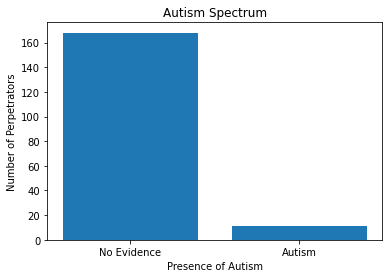

In [21]:
#bar plot to find count of mental illnesses
x = autismPresent["Autism Spectrum"]
y = a, b
dict = {'No Evidence':a, 'Autism':b}
plt.bar(list(dict.keys()),list(dict.values()) )

plt.title("Autism Spectrum")

plt.ylabel("Number of Perpetrators")
plt.xlabel("Presence of Autism")
plt.show()

In [22]:
#crime["Mental Illness"] = pd.to_numeric(crime["Mental Illness"], errors='coerce').convert_dtypes() 
#print(crime["Mental Illness"])

In [23]:
crime2 = crime[crime['Mental Illness'].notna()]

Research Question 1 - Do they have mental health issues?

In [24]:
crime['Mental Illness'].head()

1    1
2    2
3    4
4    0
5    2
Name: Mental Illness, dtype: object

In [25]:
"""
crime['Mental Illness'] = crime['Mental Illness'].replace("0", "No Evidence")
crime['Mental Illness'] = crime['Mental Illness'].replace("1", "Mood Disorder")
crime['Mental Illness'] = crime['Mental Illness'].replace("2", "Thought Disorder")
crime['Mental Illness'] = crime['Mental Illness'].replace("3", "Other Disorder")
crime['Mental Illness'] = crime['Mental Illness'].replace("4", "Indication, but no disagnosis")
crime['Mental Illness']
"""

'\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("0", "No Evidence")\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("1", "Mood Disorder")\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("2", "Thought Disorder")\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("3", "Other Disorder")\ncrime[\'Mental Illness\'] = crime[\'Mental Illness\'].replace("4", "Indication, but no disagnosis")\ncrime[\'Mental Illness\']\n'

In [26]:
mentalhealth = crime[crime['Mental Illness'].notna()]
a =(mentalhealth['Mental Illness']=="0").sum()
b = (mentalhealth['Mental Illness']=="1").sum()
c = (mentalhealth['Mental Illness']=="2").sum()
d = (mentalhealth['Mental Illness']=="3").sum()
e = (mentalhealth['Mental Illness']=="4").sum()
illnesslist = (a,b,c,d,e)

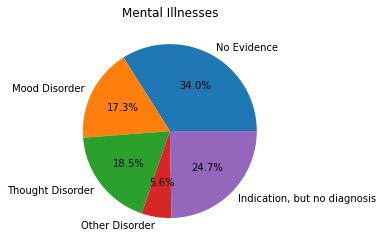

In [27]:
#Pie Chart for Mental Illness in perpetrators
x = mentalhealth["Mental Illness"]
mentalhealthlabels = ["No Evidence","Mood Disorder","Thought Disorder","Other Disorder","Indication, but no diagnosis"]
plt.pie(illnesslist, labels = mentalhealthlabels, autopct='%1.1f%%')
plt.title("Mental Illnesses")
#plt.legend(loc="lower right")
plt.show()

In [28]:
crime['Relationship Status'] = crime['Relationship Status'].replace("0", "Single")
crime['Relationship Status'] = crime['Relationship Status'].replace("1", "Dating")
crime['Relationship Status'] = crime['Relationship Status'].replace("2", "Married")
crime['Relationship Status'] = crime['Relationship Status'].replace("3", "Widowed")

In [29]:
single = (crime['Relationship Status']=="Single").sum()
dating = (crime['Relationship Status']=="Dating").sum()
married = (crime['Relationship Status']=="Married").sum()
widowed = (crime['Relationship Status']=="Widowed").sum()

Add percent or pie chart as well

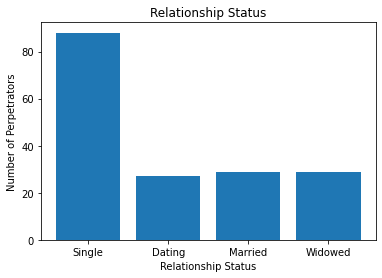

In [30]:
crime2 = crime[crime['Relationship Status'].notna()]
x = crime2["Relationship Status"]
y = single,dating,married,widowed
dict = {'Single':single, 'Dating':dating,'Married':married,'Widowed':widowed}
plt.bar(list(dict.keys()),list(dict.values()) )
plt.title("Relationship Status")
plt.ylabel("Number of Perpetrators")
plt.xlabel("Relationship Status")
plt.show()

Do the shooters use social media?

In [31]:
crime.columns.tolist()

['Case #',
 'Shooter Last Name',
 'Shooter First Name',
 'Full Date',
 'Day of Week',
 'Day',
 'Month',
 'Year',
 'Shooting Location Address',
 'City',
 'State',
 'State Code',
 'Region',
 'Urban/Suburban/Rural',
 'Location',
 'Insider / Outsider',
 'Workplace shooting',
 'Multiple Locations',
 'Other Location',
 'Armed Person on Scene',
 'Specify Armed Person',
 'Number Killed',
 'Number Injured',
 'Family Member Victim',
 'Romantic Partner Victim',
 'Kidnapping or Hostage Situation',
 'Age',
 'Gender',
 'Race',
 'Immigrant',
 'Sexual Orientation',
 'Religion',
 'Education',
 'School Performance',
 'School Performance Specified',
 'Birth Order',
 'Number of Siblings',
 'Older Siblings',
 'Younger Siblings',
 'Relationship Status',
 'Children',
 'Employment Status',
 'Employment Type\xa0',
 'Military Service',
 'Community Involvement',
 'Known to Police or FBI',
 'Criminal Record',
 'Part I Crimes',
 'Part II Crimes',
 'Highest Level of Criminal Justice Involvement',
 'History of Physi

In [32]:
crime3 = crime.rename(columns ={'Social Media Use\xa0': 'Social Media Use'})

In [33]:
crime3.head()

0 Case # Shooter Last Name Shooter First Name   Full Date Day of Week Day  \
1      1           Whitman            Charles    8/1/1966      Monday   1   
2      2             Smith             Robert  11/12/1966    Saturday  12   
3      3              Held                Leo  10/23/1967      Monday  23   
4      4           Pearson               Eric   3/16/1968    Saturday  16   
5      5         Lambright             Donald    4/5/1969    Saturday   5   

0 Month  Year                      Shooting Location Address        City  ...  \
1     8  1966       110 Inner Campus Drive, Austin, TX 78705      Austin  ...   
2    11  1966         Rose-Mar College of Beauty in Mesa, AZ        Mesa  ...   
3    10  1967  599 South Highland Street Lockhaven, PA 17745  Lock Haven  ...   
4     3  1968              11703 Lake Rd, Ironwood, MI 49938    Ironwood  ...   
5     4  1969      Pennsylvania Turnpike near Harrisburg, PA  Harrisburg  ...   

0 Planning Performance Interest in Firearms Firearm Proficiency  \
1        1           0                    1                   3   
2        1           1                    0                   1   
3        0           0                    1                   3   
4        0           0                    0                   0   
5        0           0                    0                   3   

0 Total Firearms Brought to the Scene Other Weapons or Gear On-Scene Outcome  \
1                                   7                     1                1   
2                                   1                     1                2   
3                                   2                     1                1   
4                                   1                     0                2   
5                                   2                     0                0   

0 Attempt to Flee Insanity Defense Criminal Sentence  
1               0                2                 0  
2               0                1                 1  
3               0                2                 0  
4               0                0                 3  
5               0                2                 0  

[5 rows x 136 columns]

In [34]:
crime3.columns.tolist()

['Case #',
 'Shooter Last Name',
 'Shooter First Name',
 'Full Date',
 'Day of Week',
 'Day',
 'Month',
 'Year',
 'Shooting Location Address',
 'City',
 'State',
 'State Code',
 'Region',
 'Urban/Suburban/Rural',
 'Location',
 'Insider / Outsider',
 'Workplace shooting',
 'Multiple Locations',
 'Other Location',
 'Armed Person on Scene',
 'Specify Armed Person',
 'Number Killed',
 'Number Injured',
 'Family Member Victim',
 'Romantic Partner Victim',
 'Kidnapping or Hostage Situation',
 'Age',
 'Gender',
 'Race',
 'Immigrant',
 'Sexual Orientation',
 'Religion',
 'Education',
 'School Performance',
 'School Performance Specified',
 'Birth Order',
 'Number of Siblings',
 'Older Siblings',
 'Younger Siblings',
 'Relationship Status',
 'Children',
 'Employment Status',
 'Employment Type\xa0',
 'Military Service',
 'Community Involvement',
 'Known to Police or FBI',
 'Criminal Record',
 'Part I Crimes',
 'Part II Crimes',
 'Highest Level of Criminal Justice Involvement',
 'History of Physi

In [35]:
crime3['Year'] = pd.to_numeric(crime3['Year'])

In [36]:
before2010 = crime3[(crime3['Year'] <= 2010) & (crime3['Year'] >= 2000)]
after2010 = crime3[(crime3['Year'] > 2010)]
before1999 = crime3[(crime3['Year'] < 2000)]

In [37]:
before2010none = (before2010['Social Media Use']=="0").sum()
before2010yes = (before2010['Social Media Use']=="1").sum()
after2010none = (after2010['Social Media Use']=="0").sum()
after2010yes = (after2010['Social Media Use']=="1").sum()
before1999no = (before1999['Social Media Use']=="2").sum()

In [38]:
'''
nosocialmedia = (crime3['Social Media Use']=="0" & crime3['Year'] < 2010 & crime3['Year']>=2000).sum()
socialmediause = (crime3['Social Media Use']=="1").sum()
notvalid = (crime3['Social Media Use']=="2").sum()
'''


'\nnosocialmedia = (crime3[\'Social Media Use\']=="0" & crime3[\'Year\'] < 2010 & crime3[\'Year\']>=2000).sum()\nsocialmediause = (crime3[\'Social Media Use\']=="1").sum()\nnotvalid = (crime3[\'Social Media Use\']=="2").sum()\n'

Seaborn group bar chart for before 2010 and after 2010

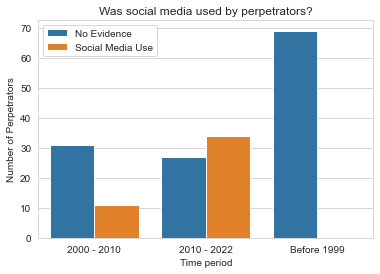

In [39]:
socialmediagrouped = {'Group': ['2000 - 2010', '2000 - 2010', '2010 - 2022', '2010 - 2022', 'Before 1999'], 
        'Category': ['No Evidence', 'Social Media Use', 'No Evidence', 'Social Media Use', 'No Evidence'], 
        'Value': [before2010none, before2010yes, after2010none, after2010yes, before1999no]}
# Create the grouped bar chart using Seaborn
sns.set_style("whitegrid")
sns.barplot(x="Group", y="Value", hue="Category", data=socialmediagrouped)

# Add titles and labels
plt.title('Was social media used by perpetrators?')
plt.xlabel('Time period')
plt.ylabel('Number of Perpetrators')

#pct = ((before2010none/351)*100, (before2010yes/351)*100, (after2010none/351)*100, (after2010yes/351)*100, (before1999no/351)*100)
#1 = sns.barplot(np.arange(len(pct)),pct)
# Show the chart
plt.show()

In [40]:
'''
socialmedia = {'No Evidence': nosocialmedia, 'Social Media Use':socialmediause, 'Before 1999':notvalid}
plt.bar(list(socialmedia.keys()),list(socialmedia.values()))
plt.xticks(rotation=45)
plt.title("Did the shooters use social media?")
plt.show()
'''

'\nsocialmedia = {\'No Evidence\': nosocialmedia, \'Social Media Use\':socialmediause, \'Before 1999\':notvalid}\nplt.bar(list(socialmedia.keys()),list(socialmedia.values()))\nplt.xticks(rotation=45)\nplt.title("Did the shooters use social media?")\nplt.show()\n'

In [41]:
crime3['School Performance Specified'] =crime3['School Performance Specified'].astype(str)
wordcloud1 = crime3['School Performance Specified'].tolist()
print(wordcloud1)

['1.9 GPA', 'good grades, on student council', 'nan', 'nan', 'brilliant, attended several colleges', "completed university with a scholarship, master's degree", 'average grades, failed a lot of courses', 'nan', 'average', 'nan', 'nan', 'brillant, top quarter of his class', 'honor student', 'nan', 'nan', 'nan', 'PhD', 'unsuccessful in college', 'nan', 'nan', 'flunking out, but very intelligent', 'nan', 'teaching degree, assumed good grades', 'nan', 'computer programmer at Stanford, assumed good grades', 'high school dropout', 'nan', 'very poor student', '51st out of 77 in high school, failed at least one course', 'nan', 'nan', 'barely passable grades, went to college on a wrestling scholarship and dropped out after a year', "master's degree", 'very good grades, graduated 61st out of 520', 'nan', 'nan', 'able to pass classes but unable to retain information, repeated 5th grade, dropped out of school at age 14', 'poor student, dropped out in 9th grade', 'nan', 'nan', 'nan', 'PhD candidate

In [42]:
testStr = '1.9 GPA good grades on student council   brilliant attended several colleges "completed university with a scholarship masters degree" average grades failed a lot of courses  average   brillant top quarter of his class honor student    PhD unsuccessful in college   flunking out but very intelligent  teaching degree assumed good grades  computer programmer at Stanford assumed good grades high school dropout  very poor student 51st out of 77 in high school failed at least one course   barely passable grades went to college on a wrestling scholarship and dropped out after a year "masters degree" very good grades graduated 61st out of 520   able to pass classes but unable to retain information repeated 5th grade dropped out of school at age 14 poor student dropped out in 9th grade    PhD candidate very gifted    did not graduate high school due to failed classes previously had to repeat grades and was on an IEP     "deans list" barely maintained a C average and repeated many courses due to untreated dyslexia took 7 years to complete his degree "deans list" not notable B and C student  studious nearly completed an engineering degree  high school dropout       genius did just enough to get by "mostly As and Bs" maintained adequate grades  "As" "As" had difficulties in school\xa0 excelled especially in math and science spotty remedial classes   mostly good grades got a GED at 18 top third of class high intelligence bad grades    excelled in school      good student "Bs in English" special education plan missed 33 days of 10th grade some college average grades struggling held back   good student smart poor study habits below grade level  did less than half his schoolwork dropped out to get a GED 2.32 GPA in college high school dropout  college degree on athletic scholarship award-winning student good student      graduated with honors expelled at 16 for bringing a gun to school    highschool dropout  unremarkable student    good student struggled in high school went to alternative school for GED top 1% of class 3.949 GPA   3.26 GPA   low grades and truancy 3.5 gpa Embry-Riddle Aeronautical University\xa0  good grades in high school good grades though slipping repeated 9th grade high grades and awards\xa0 1.75 gpa academic probation high school dropout grad school top grades average student  top half of class though formerly a very poor student 1.98 GPA      2.97 GPA 2.32 GPA 260th out of 393 students   failed out of high school   "All As" NSA internship in high school BS in computer engineering  high school dropout            described as "really smart" by a former classmate; was involved with student organizations b'

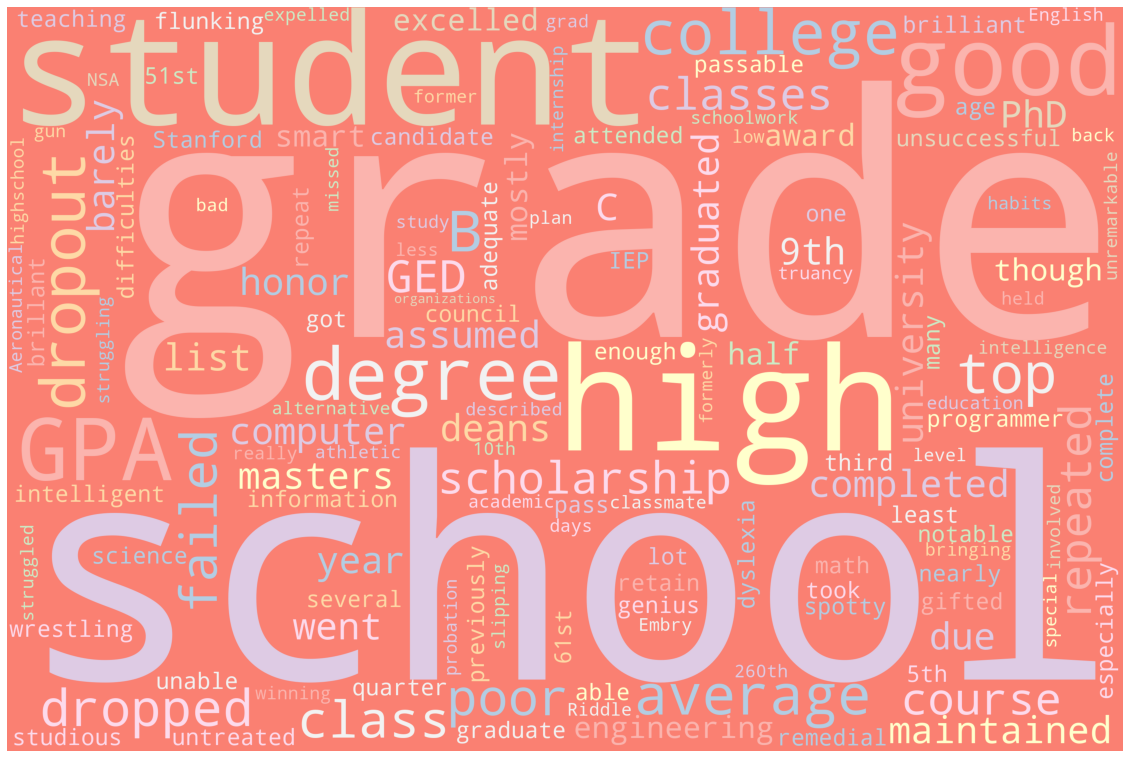

In [43]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudschool = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(testStr)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudschool)

In [44]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [45]:
schoolbigram = crime3['School Performance Specified'].apply(get_ngrams, n=2)

In [46]:
schoolbigramstring = ' '
for x in schoolbigram:
    schoolbigramstring += ' '+ x

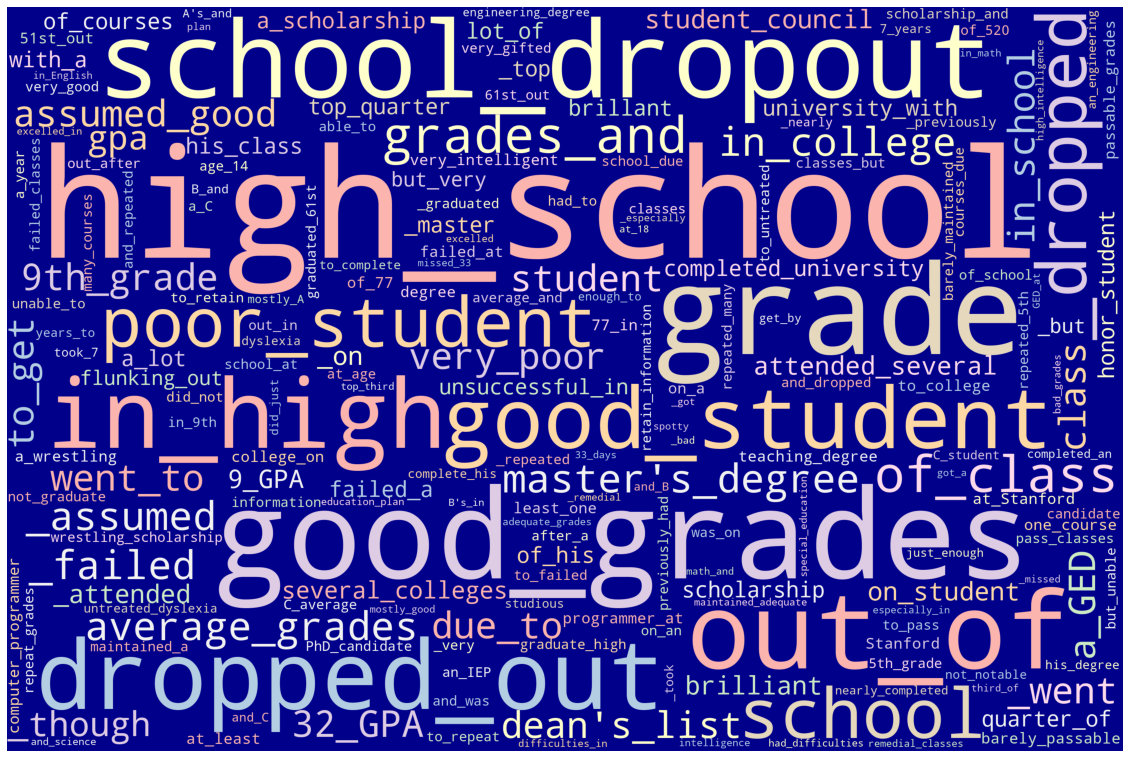

In [47]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudschoolbigram = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#00008B', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(schoolbigramstring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudschoolbigram)

In [48]:
schooltrigram = crime3['School Performance Specified'].apply(get_ngrams, n=3)

In [49]:
schooltrigramstring = ' '
for x in schooltrigram:
    if x.count("_") >=2:
        schooltrigramstring += ' '+ x

#if x.count("_") == 2:

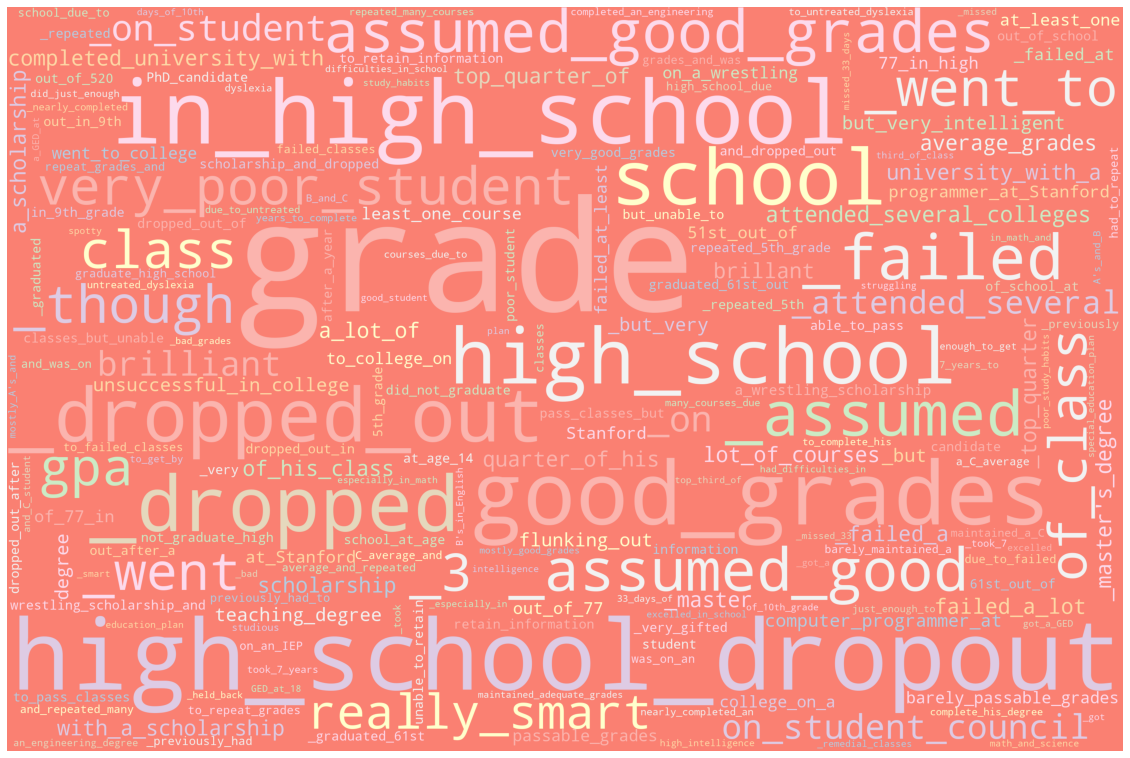

In [50]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudschooltrigram = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(schooltrigramstring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudschooltrigram)

In [51]:
testingdict = WordCloud().process_text(testStr.lower())
print(testingdict)

{'gpa': 9, 'good': 11, 'student': 15, 'council': 1, 'brilliant': 1, 'attended': 1, 'several': 1, 'completed': 2, 'university': 2, 'scholarship': 3, 'masters': 2, 'degree': 6, 'average': 5, 'failed': 4, 'lot': 1, 'brillant': 1, 'top': 5, 'quarter': 1, 'class': 4, 'honor': 2, 'phd': 2, 'unsuccessful': 1, 'college': 6, 'flunking': 1, 'intelligent': 1, 'teaching': 1, 'assumed': 2, 'computer': 2, 'programmer': 1, 'stanford': 1, 'high': 2, 'school': 6, 'dropout': 6, 'poor': 4, '51st': 1, 'least': 1, 'one': 1, 'course': 3, 'barely': 2, 'passable': 1, 'went': 2, 'wrestling': 1, 'dropped': 4, 'year': 2, 'graduated': 2, '61st': 1, 'able': 1, 'pass': 1, 'classes': 3, 'unable': 1, 'retain': 1, 'information': 1, 'repeated': 3, '5th': 1, 'grade': 21, 'age': 1, '9th': 2, 'candidate': 1, 'gifted': 1, 'graduate': 1, 'due': 2, 'previously': 1, 'repeat': 1, 'iep': 1, 'deans': 2, 'list': 2, 'maintained': 2, 'c': 2, 'many': 1, 'untreated': 1, 'dyslexia': 1, 'took': 1, 'complete': 1, 'notable': 1, 'b': 5, '

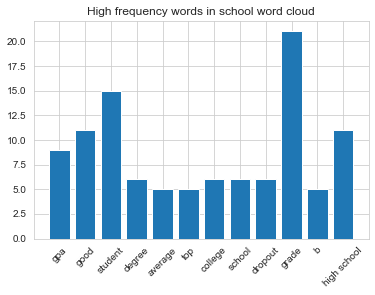

In [52]:
schoolfreq = {k:v for (k, v) in testingdict.items() if v >= 5}
plt.bar(list(schoolfreq.keys()), list(schoolfreq.values()))
plt.title("High frequency words in school word cloud")
plt.xticks(rotation=45)
plt.show()

In [53]:
schoolsentiment = list(testingdict.keys())
print(schoolsentiment)

['gpa', 'good', 'student', 'council', 'brilliant', 'attended', 'several', 'completed', 'university', 'scholarship', 'masters', 'degree', 'average', 'failed', 'lot', 'brillant', 'top', 'quarter', 'class', 'honor', 'phd', 'unsuccessful', 'college', 'flunking', 'intelligent', 'teaching', 'assumed', 'computer', 'programmer', 'stanford', 'high', 'school', 'dropout', 'poor', '51st', 'least', 'one', 'course', 'barely', 'passable', 'went', 'wrestling', 'dropped', 'year', 'graduated', '61st', 'able', 'pass', 'classes', 'unable', 'retain', 'information', 'repeated', '5th', 'grade', 'age', '9th', 'candidate', 'gifted', 'graduate', 'due', 'previously', 'repeat', 'iep', 'deans', 'list', 'maintained', 'c', 'many', 'untreated', 'dyslexia', 'took', 'complete', 'notable', 'b', 'studious', 'nearly', 'engineering', 'genius', 'enough', 'mostly', 'adequate', 'difficulties', 'excelled', 'especially', 'math', 'science', 'spotty', 'remedial', 'got', 'ged', 'third', 'intelligence', 'bad', 'english', 'special',

In [54]:
from textblob import TextBlob

def word_polarity(test_subset):
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]

    for word in test_subset:               
        testimonial = TextBlob(word)
        if testimonial.sentiment.polarity >= 0.5:
            pos_word_list.append(word)
        elif testimonial.sentiment.polarity <= -0.5:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)

    return pos_word_list, neu_word_list, neg_word_list
    #poslist = pos_word_list
   # neulist = neu_word_list
    #neglist = neg_word_list
    #print('Positive :',pos_word_list)        
    #print('Neutral :',neu_word_list)    
    #print('Negative :',neg_word_list)  

SENTIMENT ANALYSIS

sentence sentiment

In [55]:
crime3['School Performance Specified'] = crime3['School Performance Specified'].astype(str)
schoollist = crime3['School Performance Specified'].tolist()
schoollist2 = [x for x in schoollist if x!= 'nan']
print(schoollist2)

['1.9 GPA', 'good grades, on student council', 'brilliant, attended several colleges', "completed university with a scholarship, master's degree", 'average grades, failed a lot of courses', 'average', 'brillant, top quarter of his class', 'honor student', 'PhD', 'unsuccessful in college', 'flunking out, but very intelligent', 'teaching degree, assumed good grades', 'computer programmer at Stanford, assumed good grades', 'high school dropout', 'very poor student', '51st out of 77 in high school, failed at least one course', 'barely passable grades, went to college on a wrestling scholarship and dropped out after a year', "master's degree", 'very good grades, graduated 61st out of 520', 'able to pass classes but unable to retain information, repeated 5th grade, dropped out of school at age 14', 'poor student, dropped out in 9th grade', 'PhD candidate, very gifted', 'did not graduate high school due to failed classes, previously had to repeat grades and was on an IEP', "dean's list", 'bar

NEW SENTIMENT

In [56]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

def word_sentiment(input):
    positivecount = 0
    negativecount = 0
    neutralcount = 0
    # analyze sentiment for each sentence
    for sentence in input:
        scores = sid.polarity_scores(sentence)
        if(scores['compound'] > 0):
            positivecount += 1
        elif(scores['compound'] < 0):
            negativecount += 1
        else:
            neutralcount += 1
    return positivecount, negativecount, neutralcount
        #print(f"Sentiment analysis for '{sentence}': {scores}")

In [57]:
schoolpositivecount, schoolnegativecount, schoolneutralcount = word_sentiment(schoollist2)

School Sentiment Analysis with Vader

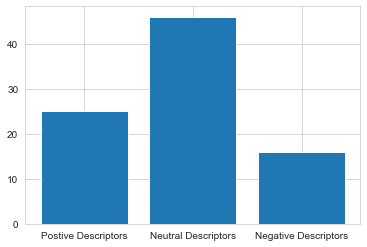

In [58]:
schoolsentimentthreedict = {"Postive Descriptors":schoolpositivecount, "Neutral Descriptors":schoolneutralcount, "Negative Descriptors":schoolnegativecount}
plt.bar(list(schoolsentimentthreedict.keys()), list(schoolsentimentthreedict.values()))
plt.show()

In [59]:
cloudcrime['Community Involvement Specified'] =cloudcrime['Community Involvement Specified'].astype(str)
wordcloud2 = cloudcrime['Community Involvement Specified'].tolist()
print(wordcloud2)

['formerly an altar boy and Eagle Scout', 'nan', 'school board member, director of the local Boy Scout troop, hunted with friends', 'nan', 'part of Black groups', 'nan', 'varsity sports in high school, no involvement as an adult', 'church', 'Cub Scouts, band', 'nan', 'former Sunday School teacher, no recent involvement', 'neighborhood community', 'nan', 'boxing tournaments', 'nan', 'nan', 'former church member, became reclusive', 'nan', 'nan', 'nan', 'friendly with customers, engaged in college classes, joined Alcoholics Anonymous', 'nan', 'nan', 'nan', 'formerly volunteered rescuing birds, became reclusive', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'involved in physics department, regularly went to bars', 'nan', 'nice neighbor, regularly went to restaurants and talked to the staff and customers, participated in martial arts competitions', 'nan', 'nan', 'nan', 'church, gambling at a card room', 'nan', 'nan', 'nan', 

In [60]:
cleanedwordcloud2 = [x for x in wordcloud2 if x!= 'nan']
print(cleanedwordcloud2)   
communitystring = ' '
for x in cleanedwordcloud2:
    communitystring += ' '+ x
print(communitystring)


['formerly an altar boy and Eagle Scout', 'school board member, director of the local Boy Scout troop, hunted with friends', 'part of Black groups', 'varsity sports in high school, no involvement as an adult', 'church', 'Cub Scouts, band', 'former Sunday School teacher, no recent involvement', 'neighborhood community', 'boxing tournaments', 'former church member, became reclusive', 'friendly with customers, engaged in college classes, joined Alcoholics Anonymous', 'formerly volunteered rescuing birds, became reclusive', 'involved in physics department, regularly went to bars', 'nice neighbor, regularly went to restaurants and talked to the staff and customers, participated in martial arts competitions', 'church, gambling at a card room', 'involved in neighborhood, environmental causes, local politics', 'therapy group', 'church', 'church', 'involved in neighborhood community', 'band', 'church, youth group volunteering', 'school events', 'school events', 'helpful in neighborhood', 'Boy S

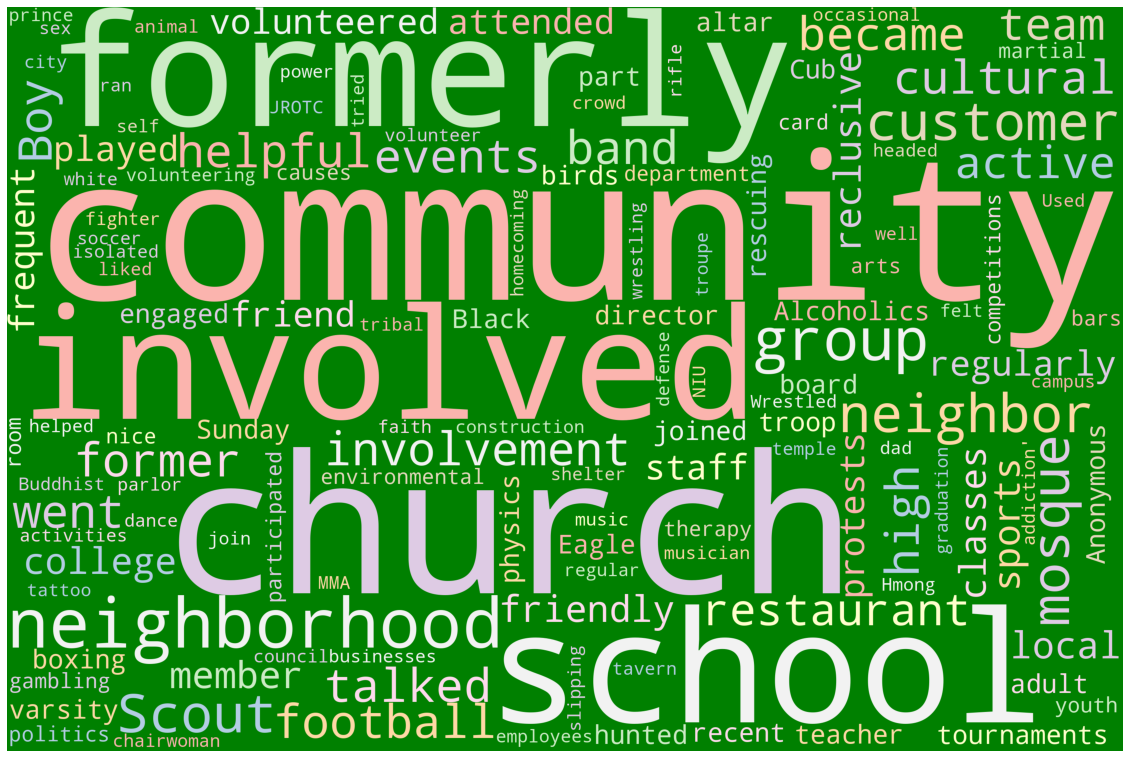

In [61]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudcommunity = WordCloud(width= 3000, height = 2000, random_state=1, background_color='green', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(communitystring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudcommunity)

In [62]:
communitybigram = cloudcrime['Community Involvement Specified'].apply(get_ngrams, n=2)

In [63]:
communitybigramstring = ' '
for x in communitybigram:
    communitybigramstring += ' '+ x

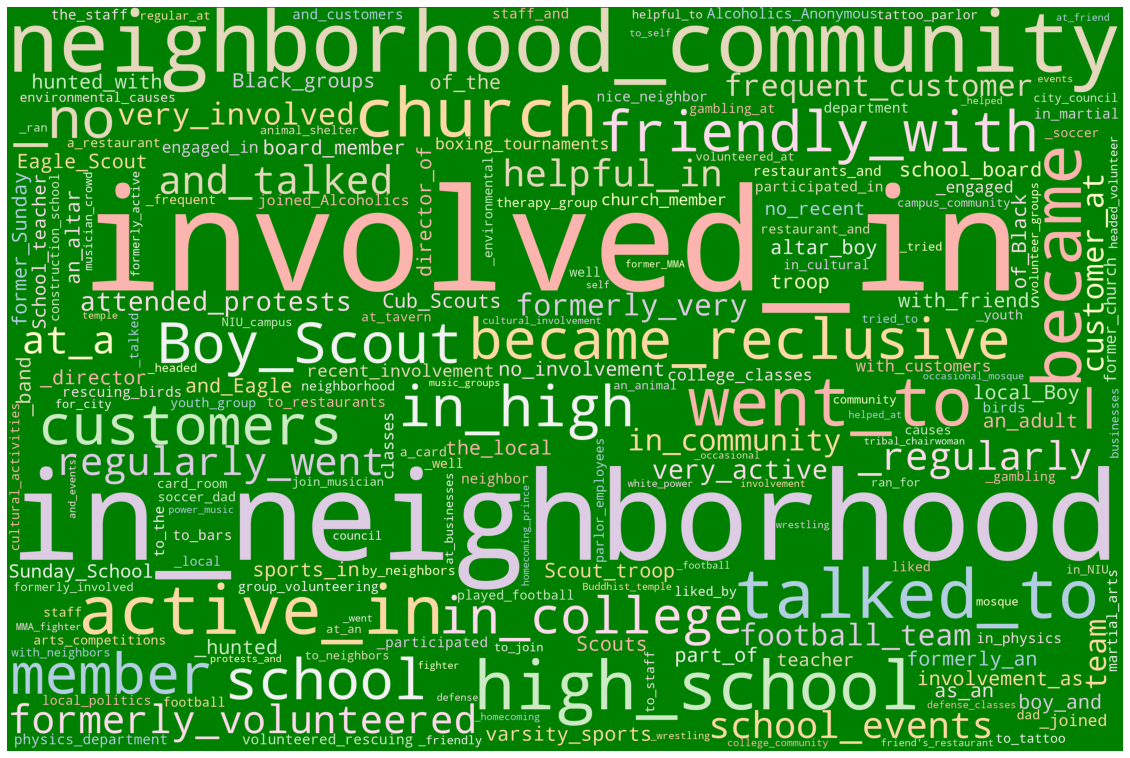

In [64]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudcommunitybigram = WordCloud(width= 3000, height = 2000, random_state=1, background_color='green', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(communitybigramstring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudcommunitybigram)

In [65]:
communitytrigram = cloudcrime['Community Involvement Specified'].apply(get_ngrams, n=3)

In [66]:
communitytrigramstring = ' '
for x in communitytrigram:
    if x.count("_") >=2:
        communitytrigramstring += ' '+ x

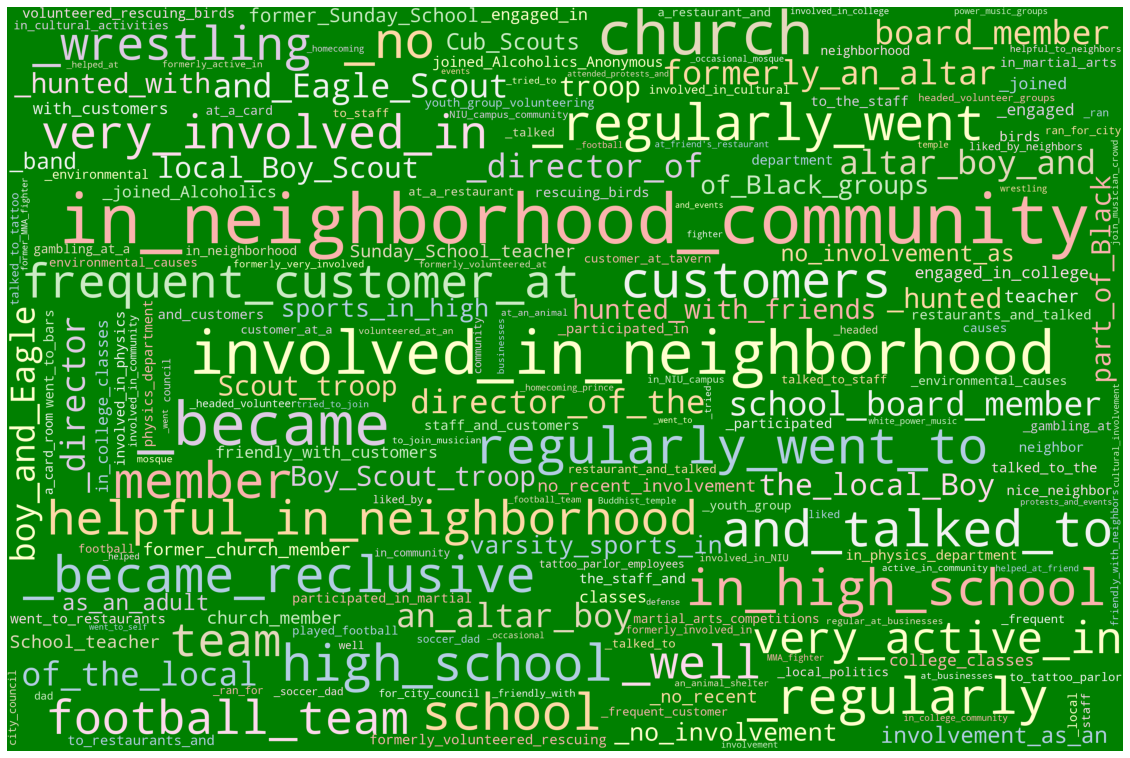

In [67]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudcommunitytrigram = WordCloud(width= 3000, height = 2000, random_state=1, background_color='green', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(communitytrigramstring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudcommunitytrigram)

COMMUNITY SENTIMENT ANALYSIS

In [68]:
communitylist = cloudcrime['Community Involvement Specified'].tolist()
communitylist2 = [x for x in communitylist if x!= 'nan']

In [69]:
communitypositivecount, communitynegativecount, communityneutralcount = word_sentiment(communitylist2)

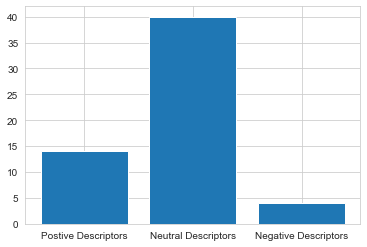

In [70]:
communitysentimentthreedict = {"Postive Descriptors":communitypositivecount, "Neutral Descriptors":communityneutralcount, "Negative Descriptors":communitynegativecount}
plt.bar(list(communitysentimentthreedict.keys()), list(communitysentimentthreedict.values()))
plt.show()

In [71]:
cloudcrime['Signs of Crisis Expanded'] =cloudcrime['Signs of Crisis Expanded'].astype(str)
wordcloud3 = cloudcrime['Signs of Crisis Expanded'].tolist()
#print(wordcloud3)

In [72]:
cleanedwordcloud3 = [x for x in wordcloud3 if x!= 'nan']
print(cleanedwordcloud3)   
crisisstring = ' '
for x in cleanedwordcloud3:
    crisisstring += ' '+ x
#print(crisisstring)


["A few months before the shooting, he saw a psychiatrist for anger issues, inability to complete his schoolwork, and difficulty handling his parents' divorce. He mentioned a fantasy about going up on top of the tower and shooting people. The psychiatrist noted his rapid mood swings and overwhelming periods of hostility with little provocation.", "A few years before the shooting, he became obsessed with famous murderers and alarmed his classmates with his views. His obsession with murderers began after JFK was assassinated - he had been Smith's hero.", 'He stopped talking to his friends in the months leading up to the shooting. He only ate canned food because he was paranoid that someone was going to poison him and he thought someone had tapped his telephone line. He felt persecuted by coworkers and bosses, a carpool group which criticized his driving, and his neighbors who he thought burned leaves just to upset him.\xa0', 'In the days before the shooting, he was paranoid that "the man

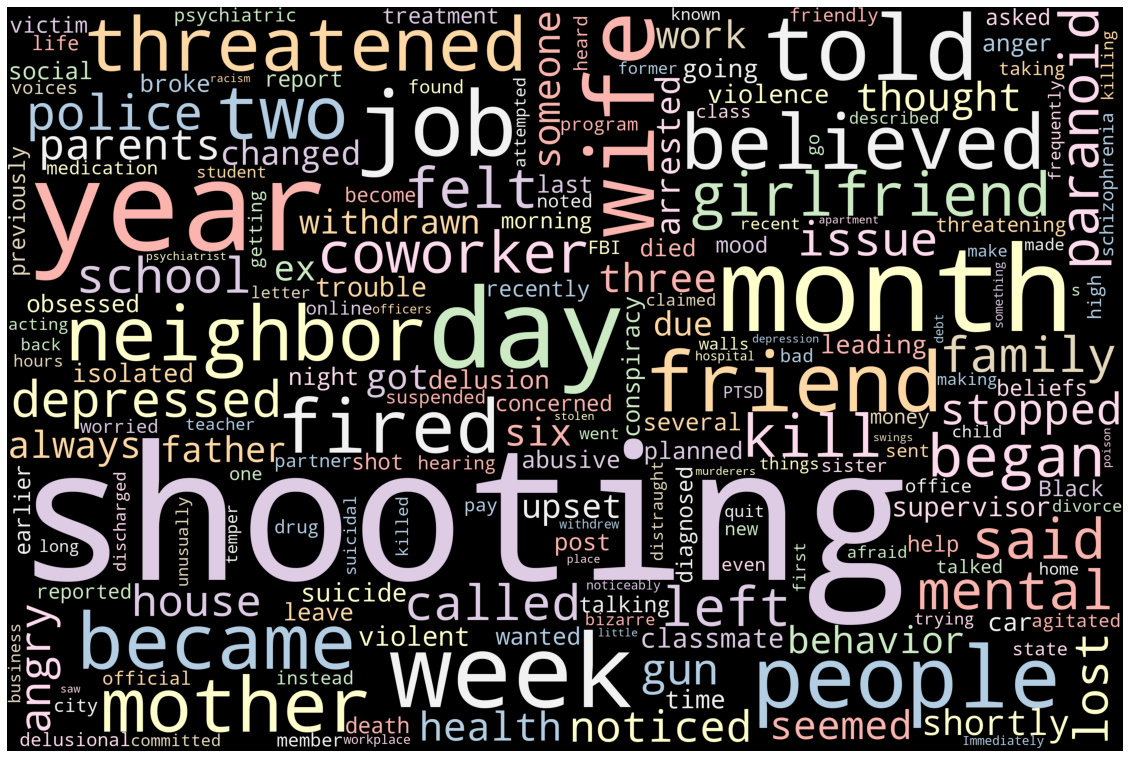

In [73]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudcrisis = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(crisisstring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudcrisis)

In [74]:
crimebigram = cloudcrime['Signs of Crisis Expanded'].apply(get_ngrams, n=2)

In [75]:
crimebigramstring = ' '
for x in crimebigram:
    crimebigramstring += ' '+ x

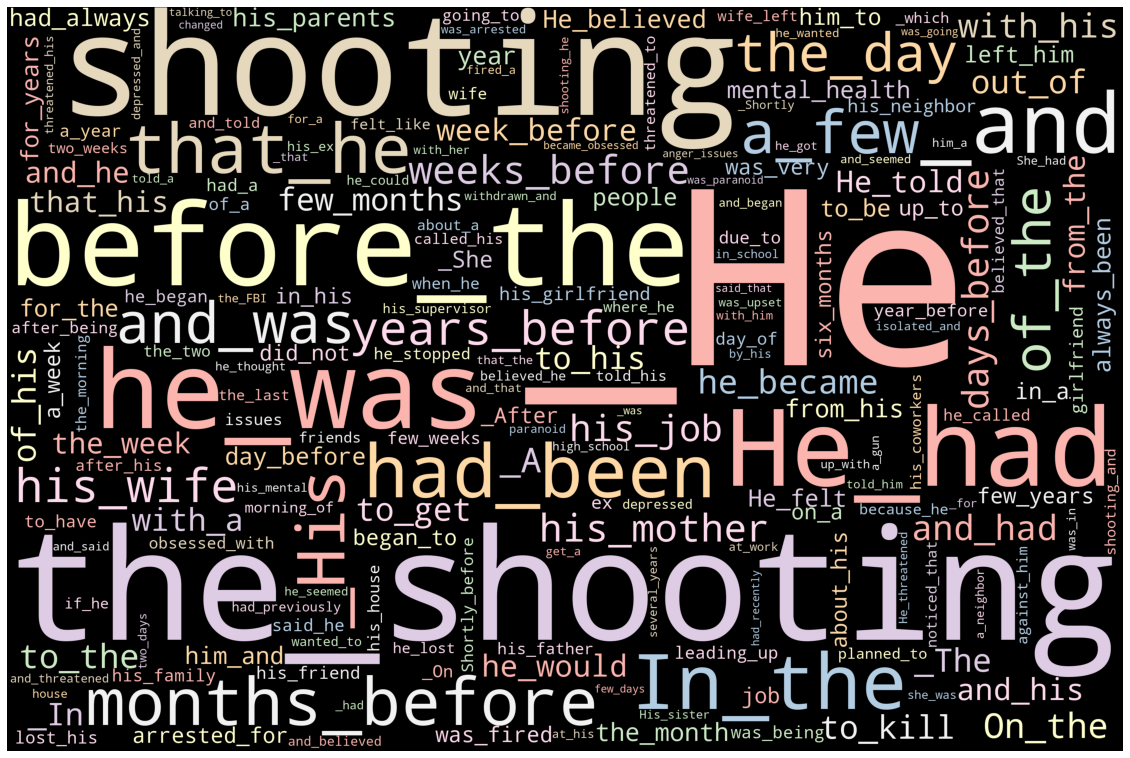

In [76]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudcrimebigram = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(crimebigramstring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudcrimebigram)

In [77]:
crimetrigram = cloudcrime['Signs of Crisis Expanded'].apply(get_ngrams, n=3)

In [78]:
crimetrigramstring = ' '
for x in crimetrigram:
    if x.count("_") >=2:
        crimetrigramstring += ' '+ x

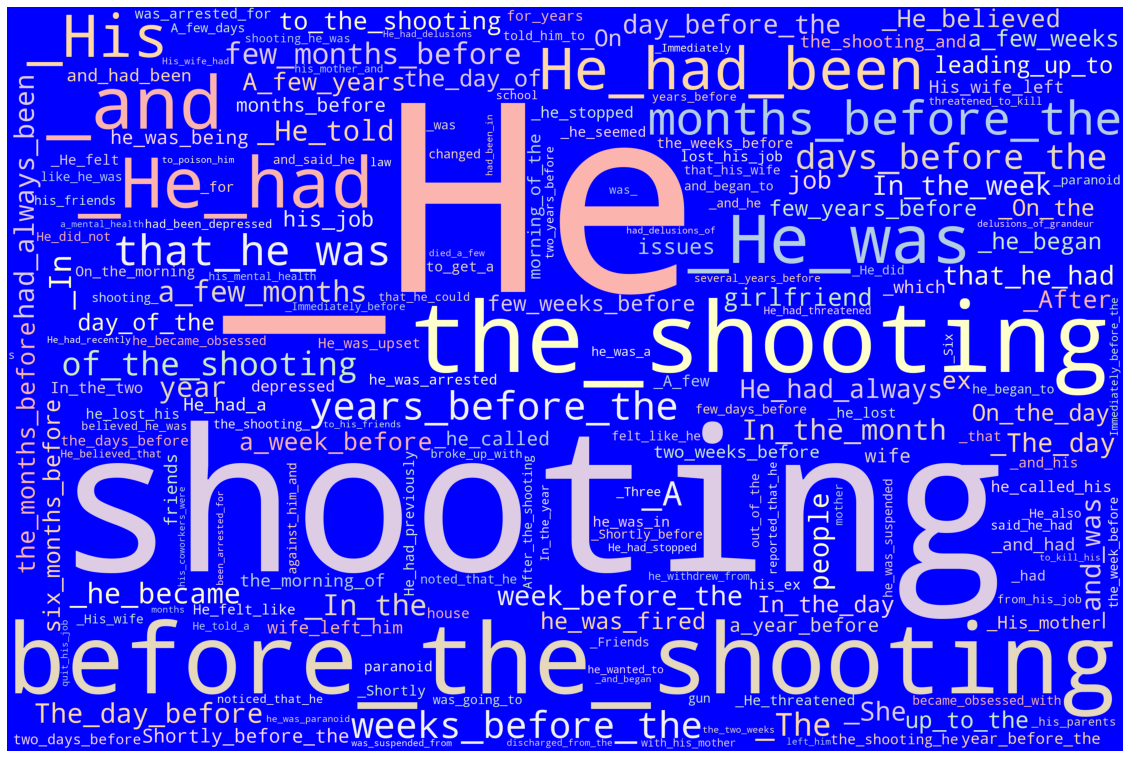

In [79]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloudcrimetrigram = WordCloud(width= 3000, height = 2000, random_state=1, background_color='blue', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(crimetrigramstring)
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(wordcloud1)
# Plot
plot_cloud(wordcloudcrimetrigram)

CRISIS SENTIMENT ANALYSIS

In [80]:
crisislist = cloudcrime['Signs of Crisis Expanded'].tolist()
crisislist2 = [x for x in crisislist if x!= 'nan']

In [81]:
crisispositivecount, crisisnegativecount, crisisneutralcount = word_sentiment(crisislist2)

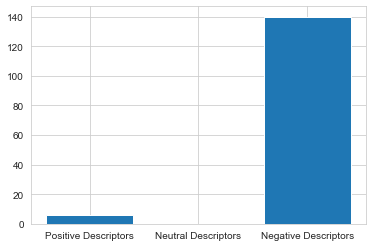

In [82]:
crisissentimentthreedict = {"Positive Descriptors":crisispositivecount, "Neutral Descriptors":crisisneutralcount, "Negative Descriptors":crisisnegativecount}
plt.bar(list(crisissentimentthreedict.keys()), list(crisissentimentthreedict.values()))
plt.show()

In [83]:
#new
bothcount = 0
monthcount = 0
yearcount = 0
nonecount = 0
for i in cleanedwordcloud3:
    if "year" in i and ("month" in i  or "day" in i) :
        #print("both:", i)
        bothcount += 1
    elif "month" in i or "day" in i:
        #print("month/day:", i)
        monthcount += 1
    elif "year" in i:
        #print("year:", i)
        yearcount += 1
    else:
       nonecount += 1

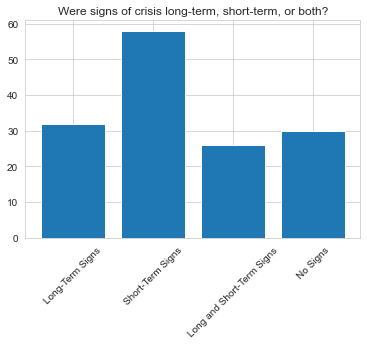

In [84]:
crisistimelinedict = {"Long-Term Signs": yearcount, "Short-Term Signs": monthcount, "Long and Short-Term Signs":bothcount, "No Signs": nonecount}
plt.bar(list(crisistimelinedict.keys()), list(crisistimelinedict.values()))
plt.title("Were signs of crisis long-term, short-term, or both?")
plt.xticks(rotation=45)
plt.show()

History of Physical Altercations or Bullying

In [85]:
historyyes = (crime3['History of Physical Altercations'] == '1').sum()
historyno = (crime3['History of Physical Altercations'] == '0').sum()
historyobjects = (crime3['History of Physical Altercations'] == '2').sum()
bulliedyes = (crime3['Bullied'] == '1').sum()
bulliedno = (crime3['Bullied'] == '0').sum()


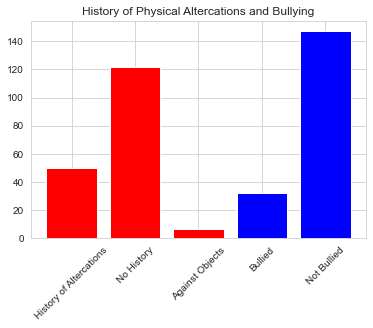

In [86]:
physicalaltercations = {'History of Altercations':historyyes, 'No History':historyno,'Against Objects':historyobjects, 'Bullied':bulliedyes, 'Not Bullied':bulliedno}
plt.bar(list(physicalaltercations.keys()),list(physicalaltercations.values()), color=['red', 'red', 'red', 'blue', 'blue'])
plt.xticks(rotation=45)
plt.title("History of Physical Altercations and Bullying")
plt.show()

## Impact of Violent Video Games

In [173]:
crime3.head(3)

0 Case # Shooter Last Name Shooter First Name   Full Date Day of Week Day  \
1      1           Whitman            Charles    8/1/1966      Monday   1   
2      2             Smith             Robert  11/12/1966    Saturday  12   
3      3              Held                Leo  10/23/1967      Monday  23   

0 Month    Year                      Shooting Location Address        City  \
1     8  1966.0       110 Inner Campus Drive, Austin, TX 78705      Austin   
2    11  1966.0         Rose-Mar College of Beauty in Mesa, AZ        Mesa   
3    10  1967.0  599 South Highland Street Lockhaven, PA 17745  Lock Haven   

0  ... Planning Performance Interest in Firearms Firearm Proficiency  \
1  ...        1           0                    1                   3   
2  ...        1           1                    0                   1   
3  ...        0           0                    1                   3   

0 Total Firearms Brought to the Scene Other Weapons or Gear On-Scene Outcome  \
1                                   7                     1                1   
2                                   1                     1                2   
3                                   2                     1                1   

0 Attempt to Flee Insanity Defense Criminal Sentence  
1               0                2                 0  
2               0                1                 1  
3               0                2                 0  

[3 rows x 136 columns]

In [192]:
print(type(crime3['Year'].iloc[0]))
filter = crime3['Year'] > 1992
crime3_videogames = crime3[filter]
crime3_videogames.shape

<class 'numpy.float64'>


(133, 136)

In [180]:
videogames_yes = (crime3_videogames['Violent Video Games'] == '1').sum()
videogames_no = (crime3_videogames['Violent Video Games'] == '0').sum() 
videogames_other = (crime3_videogames['Violent Video Games'] == '2').sum() #played unspecified video games.
 

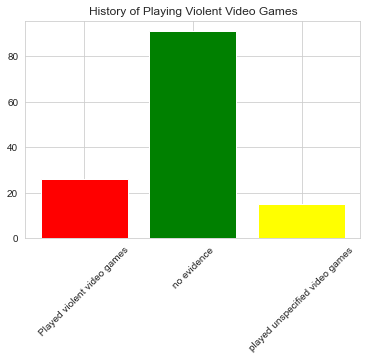

In [181]:
barchart_violentVideoGames = {'Played violent video games':videogames_yes, 'no evidence':videogames_no,'played unspecified video games':videogames_other}
plt.bar(list(barchart_violentVideoGames.keys()),list(barchart_violentVideoGames.values()), color=['red', 'green', 'yellow'])
plt.xticks(rotation=45)
plt.title("History of Playing Violent Video Games (after 1992)")
plt.show()

In [189]:
print(type(crime3['Year'].iloc[0]))
filter = (crime3['Year'] >=2000) & (crime3['Year'] <=2022)
crime3_videogames = crime3[filter]
crime3_videogames.shape

<class 'numpy.float64'>


(104, 136)

In [187]:
videogames_yes = (crime3_videogames['Violent Video Games'] == '1').sum()
videogames_no = (crime3_videogames['Violent Video Games'] == '0').sum() 
videogames_other = (crime3_videogames['Violent Video Games'] == '2').sum() #played unspecified video games.
 

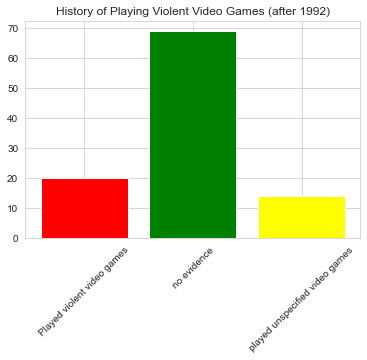

In [188]:
barchart_violentVideoGames = {'Played violent video games':videogames_yes, 'no evidence':videogames_no,'played unspecified video games':videogames_other}
plt.bar(list(barchart_violentVideoGames.keys()),list(barchart_violentVideoGames.values()), color=['red', 'green', 'yellow'])
plt.xticks(rotation=45)
plt.title("History of Playing Violent Video Games (after 1992)")
plt.show()

In [193]:
print(type(crime3['Year'].iloc[0]))
filter = (crime3['Year'] >=2010) & (crime3['Year'] <=2022)
crime3_videogames = crime3[filter]
crime3_videogames.shape

<class 'numpy.float64'>


(67, 136)

In [194]:
videogames_yes = (crime3_videogames['Violent Video Games'] == '1').sum()
videogames_no = (crime3_videogames['Violent Video Games'] == '0').sum() 
videogames_other = (crime3_videogames['Violent Video Games'] == '2').sum() #played unspecified video games.
 

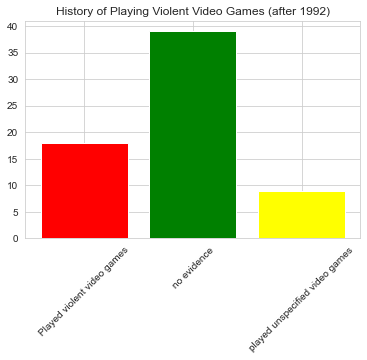

In [195]:
barchart_violentVideoGames = {'Played violent video games':videogames_yes, 'no evidence':videogames_no,'played unspecified video games':videogames_other}
plt.bar(list(barchart_violentVideoGames.keys()),list(barchart_violentVideoGames.values()), color=['red', 'green', 'yellow'])
plt.xticks(rotation=45)
plt.title("History of Playing Violent Video Games (after 1992)")
plt.show()

In [ ]:
### line plot for # of video game players between 1993 ~ 2022

## line plot:  # of shootings and # of shooters playing violent Video game, and # of shooters using social media over the years

In [426]:
def changeYear(year):
    
    if (1993 <= year < 1998):
        return '1993 ~ 1998'  
    elif (1998 <= year < 2003):
        return '1998 ~ 2003'
    elif (2003 <= year < 2008):
        return '2003 ~ 2008'
    elif (2008 <= year < 2013):
        return '2008 ~ 2013'
    elif (2013 <= year < 2018):
        return '2013 ~ 2018'
    else: #if (2018 <= year < 2023):
        return '2018 ~ 2023'

In [324]:
def changeYear1(year):
    
    if (1993 <= year < 1996):
        return '1993 ~ 1996'  
    elif (1996 <= year < 1999):
        return '1996 ~ 1999'
    elif (1999 <= year < 2002):
        return '1999 ~ 2002'
    elif (2002 <= year < 2005):
        return '2002 ~ 2005'
    elif (2005 <= year < 2008):
        return '2005 ~ 2008'
    elif (2008 <= year < 2011):
        return '2008 ~ 2011'
    elif (2011 <= year < 2014):
        return '2011 ~ 2014'
    elif (2014 <= year < 2017):
        return '2014 ~ 2017'
    elif (2017 <= year < 2020):
        return '2017 ~ 2020'
    else: #if (2020 <= year < 2023):
        return '2020 ~ 2023'

In [410]:
def changeYear2(year): #year period same as that of a president's term of office
    
    if (1992 <= year < 1996):
        return '1992 ~ 1996'  
    elif (1996 <= year < 2000):
        return '1996 ~ 2000'
    elif (2000 <= year < 2004):
        return '2000 ~ 2004'
    elif (2004 <= year < 2008):
        return '2004 ~ 2008'
    elif (2008 <= year < 2012):
        return '2008 ~ 2012'
    elif (2012 <= year < 2016):
        return '2012 ~ 2016'
    elif (2016 <= year < 2020):
        return '2016 ~ 2020'
    else: #if (2020 <= year < 2023):
        return '2020 ~ 2023'

In [427]:
crime3_by5years = crime3.copy()
filter = crime3_by5years['Year'] > 1992
crime3_by5years = crime3_by5years[filter]
crime3_by5years.shape

(133, 136)

In [428]:
crime3_by5years['Year'] = crime3_by5years['Year'].apply(changeYear)
crime3_by5years.head(3)

0  Case # Shooter Last Name Shooter First Name   Full Date Day of Week Day  \
49     49             Ferri               Gian    7/1/1993    Thursday   1   
50     50            French            Kenneth    8/6/1993      Friday   6   
51     51            Buquet              James  10/14/1993    Thursday  14   

0  Month         Year                          Shooting Location Address  \
49     7  1993 ~ 1998     101 California Street, San Francisco, CA 94111   
50     8  1993 ~ 1998  528 N McPherson Church Rd, Fayetteville, NC 28303   
51    10  1993 ~ 1998                  850 Arnele Ave El Cajon, CA 92020   

0            City  ... Planning Performance Interest in Firearms  \
49  San Francisco  ...        0           0                    0   
50   Fayetteville  ...        0           0                    0   
51       El Cajon  ...        0           0                    0   

0  Firearm Proficiency Total Firearms Brought to the Scene  \
49                   1                                   3   
50                   3                                   3   
51                   0                                   1   

0  Other Weapons or Gear On-Scene Outcome Attempt to Flee Insanity Defense  \
49                     1                0               0                2   
50                     0                2               0                0   
51                     0                0               0                2   

0  Criminal Sentence  
49                 0  
50                 3  
51                 0  

[3 rows x 136 columns]

### Playing Violent Video Games

In [429]:
type(crime3_by5years['Violent Video Games'].iloc[0])

str

In [430]:
df_vvg_by5years = crime3_by5years[['Shooter Last Name', 'Year', 'Violent Video Games']].groupby(['Year', 'Violent Video Games']).count().reset_index()

df_vvg_by5years = df_vvg_by5years.rename(columns = {'Shooter Last Name': 'Count'})
df_vvg_by5years.head(3)
                                                    

0         Year Violent Video Games  Count
0  1993 ~ 1998                   0     16
1  1993 ~ 1998                   1      1
2  1998 ~ 2003                   0     13

In [431]:

f0 = df_vvg_by5years['Violent Video Games'] == '0'
df_vvg_by5years_no = df_vvg_by5years[f0]
                     
f1 = df_vvg_by5years['Violent Video Games'] == '1'
df_vvg_by5years_yes = df_vvg_by5years[f1]
                     
f2 = df_vvg_by5years['Violent Video Games'] == '2'
df_vvg_by5years_other = df_vvg_by5years[f2]

In [432]:
df_vvg_by5years_no.head()

0          Year Violent Video Games  Count
0   1993 ~ 1998                   0     16
2   1998 ~ 2003                   0     13
5   2003 ~ 2008                   0     14
8   2008 ~ 2013                   0     20
11  2013 ~ 2018                   0     14

### social media Use

In [433]:
df_socialMedia_by5years = crime3_by5years[['Shooter Last Name', 'Year', 'Social Media Use']].groupby(['Year', 'Social Media Use']).count().reset_index()

df_socialMedia_by5years = df_socialMedia_by5years.rename(columns = {'Shooter Last Name': 'Count'})
df_socialMedia_by5years.head(3)
                                                    

0         Year Social Media Use  Count
0  1993 ~ 1998                2     17
1  1998 ~ 2003                0     13
2  1998 ~ 2003                1      3

In [434]:

f0 = df_socialMedia_by5years['Social Media Use'] == '0'
df_socialMedia_by5years_no = df_socialMedia_by5years[f0]
                     
f1 = df_socialMedia_by5years['Social Media Use'] == '1'
df_socialMedia_by5years_yes = df_socialMedia_by5years[f1]
                     

In [407]:
df_socialMedia_by5years_no.head()

0          Year Social Media Use  Count
1   1998 ~ 2003                0     13
4   2003 ~ 2008                0     15
6   2008 ~ 2013                0     17
8   2013 ~ 2018                0     11
10  2018 ~ 2023                0      9

### Number of Shooters

In [435]:
df_numShootings_by5years = crime3_by5years[['Shooter Last Name', 'Year']].groupby(['Year']).count().reset_index()

df_numShootings_by5years = df_numShootings_by5years.rename(columns = {'Shooter Last Name': 'Count'})
df_numShootings_by5years.head(3)
                                                    

0         Year  Count
0  1993 ~ 1998     17
1  1998 ~ 2003     20
2  2003 ~ 2008     19

import pandas as pd
import matplotlib.pyplot as plt


# create a figure and axis object
fig, ax = plt.subplots()

# plot the first line
ax.plot(df_vvg_by5years_no['Year'], df_vvg_by5years_no['Count'], label='No')

# plot the second line
ax.plot(df_vvg_by5years_yes['Year'], df_vvg_by5years_yes['Count'], label='Yes')

# plot the third line
ax.plot(df_vvg_by5years_other['Year'], df_vvg_by5years_other['Count'], label='unspecified video games')

# add axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Number of Shooters Who Play Violent Videogames ')

# add a legend
ax.legend()

# show the plot
plt.show()


In [239]:
f = crime3['Year'] == 2002
crime3[f].shape

(1, 136)

In [ ]:
df_numOfShootings_byyear = crime3[['Shooter Last Name', 'Year']].groupby(['Year']).count().reset_index()
df_numOfShootings_byyear = df_numOfShootings_byyear.rename(columns = {'Shooter Last Name' : 'ShootingCount'})
df_numOfShootings_byyear.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# create a figure and axis object
fig, ax = plt.subplots()

# plot the first line
ax.plot(df_numOfShootings_byyear['Year'], df_numOfShootings_byyear['ShootingCount'])

# add axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Number of Mass Shootings ')

# add a legend
ax.legend()

# show the plot
plt.show()


In [254]:
df_socialMedia_by5years = crime3_by5years[['Shooter Last Name', 'Year', 'Social Media Use']].groupby(['Year', 'Social Media Use']).count().reset_index()

df_socialMedia_by5years = df_socialMedia_by5years.rename(columns = {'Shooter Last Name': 'ShootingCount'})
df_socialMedia_by5years.head(3)
                                                    

0         Year  ShootingCount
0  1993 ~ 1998             17
1  1998 ~ 2003             20
2  2003 ~ 2008             19

In [254]:
df_shootingCount_by5years = crime3_by5years[['Shooter Last Name', 'Year']].groupby(['Year']).count().reset_index()

df_shootingCount_by5years = df_shootingCount_by5years.rename(columns = {'Shooter Last Name': 'ShootingCount'})
df_shootingCount_by5years.head(3)
                                                    

0         Year  ShootingCount
0  1993 ~ 1998             17
1  1998 ~ 2003             20
2  2003 ~ 2008             19

/var/folders/v9/sl4_c3cd70v1dz89lxcl06sc0000gp/T/ipykernel_3266/3562082203.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_numShootings_by5years['Year'], rotation = 45)
/var/folders/v9/sl4_c3cd70v1dz89lxcl06sc0000gp/T/ipykernel_3266/3562082203.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_numShootings_by5years['Year'], rotation = 45)


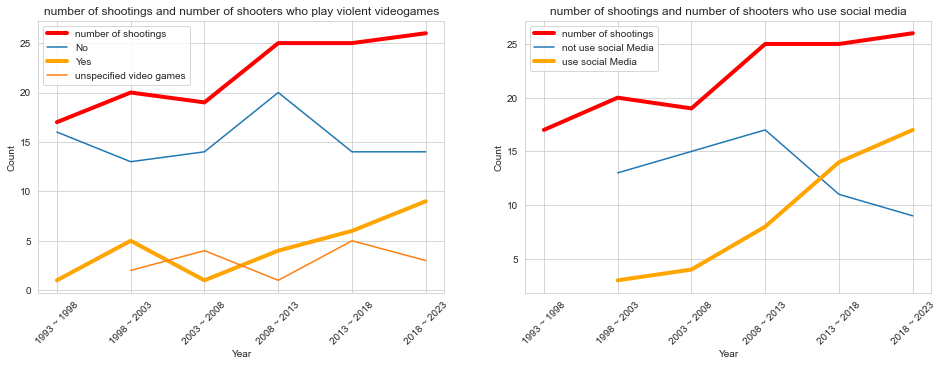

In [436]:
import pandas as pd
import matplotlib.pyplot as plt


# create a figure and axis object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5) )

ax1.plot(df_numShootings_by5years['Year'], df_numShootings_by5years['Count'], label='number of shootings', color = 'r', linewidth = 4)
ax1.plot(df_vvg_by5years_no['Year'], df_vvg_by5years_no['Count'], label='No')
ax1.plot(df_vvg_by5years_yes['Year'], df_vvg_by5years_yes['Count'], label='Yes', color = 'orange', linewidth = 4)
ax1.plot(df_vvg_by5years_other['Year'], df_vvg_by5years_other['Count'], label='unspecified video games')

ax1.legend()

ax2.plot(df_numShootings_by5years['Year'], df_numShootings_by5years['Count'], label='number of shootings', color = 'r', linewidth = 4)
ax2.plot(df_socialMedia_by5years_no['Year'], df_socialMedia_by5years_no['Count'], label='not use social Media')
ax2.plot(df_socialMedia_by5years_yes['Year'], df_socialMedia_by5years_yes['Count'], label='use social Media', color = 'orange', linewidth = 4)
 

ax2.legend()

# add axis labels and title
ax1.set_xlabel('Year' )
ax1.set_xticklabels(df_numShootings_by5years['Year'], rotation = 45)
ax1.set_ylabel('Count')
ax1.set_title('number of shootings and number of shooters who play violent videogames')

ax2.set_xlabel('Year')
ax2.set_xticklabels(df_numShootings_by5years['Year'], rotation = 45)
ax2.set_ylabel('Count')
ax2.set_title('number of shootings and number of shooters who use social media')

# add a legend
ax.legend()

# show the plot
plt.show()


### Be careful not to draw the conclusion about correlation: because there are very few data points.

In [438]:
# Note : when the two curves are not generally linear, even though the curves seem to have the same
# trend, their correlation coefficient might be -1. (changeYear() vs. changeYear2())

corr_coef1 = df_numShootings_by5years['Count'].corr(df_vvg_by5years_yes['Count'])
print("Correlation coefficient (# of mass shootings and # of shooters who play VIOLENT video games: {:.2f}".format(corr_coef1))

f2 = df_numShootings_by5years['Year'] != '1993 ~ 1998'
df_numShootings_by5years_new = df_numShootings_by5years[f2]
print(df_numShootings_by5years_new.shape)
print(df_vvg_by5years_other.shape)

corr_coef2 = df_numShootings_by5years_new['Count'].corr(df_vvg_by5years_other['Count'])
print("Correlation coefficient (# of mass shootings and # of shooters who play UNSPECIFIED video games: {:.2f}".format(corr_coef2))

corr_coef3 = df_numShootings_by5years['Count'].corr(df_vvg_by5years_no['Count'])
print("Correlation coefficient (# of mass shootings and # of shooters who play NO video games: {:.2f}".format(corr_coef3))


# correlation with social media use.
f = df_numShootings_by5years['Year'] != '1993 ~ 1998'
df_numShootings_by5years_new = df_numShootings_by5years[f]

corr_coef3 = df_numShootings_by5years_new['Count'].corr(df_vvg_by5years_yes['Count'])
print("Correlation coefficient (# of mass shootings and # of shooters who use social media: {:.2f}".format(corr_coef3))

Correlation coefficient (# of mass shootings and # of shooters who play VIOLENT video games: 1.00
(5, 2)
(5, 3)
Correlation coefficient (# of mass shootings and # of shooters who play UNSPECIFIED video games: nan
Correlation coefficient (# of mass shootings and # of shooters who play NO video games: -0.39
Correlation coefficient (# of mass shootings and # of shooters who use social media: 1.00


/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [420]:
df_numShootings_by5years

0         Year  Count
0  1992 ~ 1996     11
1  1996 ~ 2000     18
2  2000 ~ 2004     12
3  2004 ~ 2008     15
4  2008 ~ 2012     19
5  2012 ~ 2016     20
6  2016 ~ 2020     28
7  2020 ~ 2023      9

In [399]:
df_numShootings_by5years_new

0         Year  Count
1  1998 ~ 2003     20
2  2003 ~ 2008     19
3  2008 ~ 2013     25
4  2013 ~ 2018     25
5  2018 ~ 2023     26

In [421]:
df_vvg_by5years_yes

0          Year Violent Video Games  Count
1   1992 ~ 1996                   1      1
3   1996 ~ 2000                   1      5
8   2004 ~ 2008                   1      1
11  2008 ~ 2012                   1      2
14  2012 ~ 2016                   1      4
17  2016 ~ 2020                   1     11
20  2020 ~ 2023                   1      2

In [380]:
df_vvg_by5years_no

0          Year Violent Video Games  Count
0   1992 ~ 1996                   0     10
2   1996 ~ 2000                   0     12
5   2000 ~ 2004                   0     11
7   2004 ~ 2008                   0     10
10  2008 ~ 2012                   0     16
13  2012 ~ 2016                   0     12
16  2016 ~ 2020                   0     14
19  2020 ~ 2023                   0      6

In [422]:
df_vvg_by5years_other

0          Year Violent Video Games  Count
4   1996 ~ 2000                   2      1
6   2000 ~ 2004                   2      1
9   2004 ~ 2008                   2      4
12  2008 ~ 2012                   2      1
15  2012 ~ 2016                   2      4
18  2016 ~ 2020                   2      3
21  2020 ~ 2023                   2      1

### MORE CORRELATION

In [301]:
crime3_after1992 = crime3.copy()
filter = crime3_after1992['Year'] > 1992
crime3_after1992 = crime3_after1992[filter]
crime3_after1992.shape

(133, 136)

In [303]:
df_numShootings = crime3_after1992[['Shooter Last Name', 'Year']].groupby(['Year']).count().reset_index()

df_numShootings = df_numShootings.rename(columns = {'Shooter Last Name': 'Count'})
df_numShootings.head()
                                                    

0    Year  Count
0  1993.0      6
1  1994.0      2
2  1995.0      3
3  1996.0      2
4  1997.0      4

In [305]:
df_vvg = crime3_after1992[['Shooter Last Name', 'Year', 'Violent Video Games']].groupby(['Year', 'Violent Video Games']).count().reset_index()

df_vvg = df_vvg.rename(columns = {'Shooter Last Name': 'Count'})
df_vvg.shape                                          

(56, 3)

In [308]:

f0 = df_vvg['Violent Video Games'] == '0'
df_vvg_no = df_vvg[f0]
                     
f1 = df_vvg['Violent Video Games'] == '1'
df_vvg_yes = df_vvg[f1]

                     
f2 = df_vvg['Violent Video Games'] == '2'
df_vvg_otherGames = df_vvg[f2]

df_vvg_yes.head()

0     Year Violent Video Games  Count
1   1993.0                   1      1
7   1998.0                   1      3
9   1999.0                   1      2
20  2006.0                   1      1
24  2008.0                   1      1

In [309]:
corr_coef1 = df_numShootings['Count'].corr(df_vvg_yes['Count'])
print("Correlation coefficient (# of mass shootings and # of shooters who play VIOLENT video games: {:.2f}".format(corr_coef1))

corr_coef2 = df_numShootings['Count'].corr(df_vvg_otherGames['Count'])
print("Correlation coefficient (# of mass shootings and # of shooters who play UNSPECIFIED video games: {:.2f}".format(corr_coef1))


Correlation coefficient (# of mass shootings and # of shooters who play VIOLENT video games: -0.25
Correlation coefficient (# of mass shootings and # of shooters who play UNSPECIFIED video games: -0.25


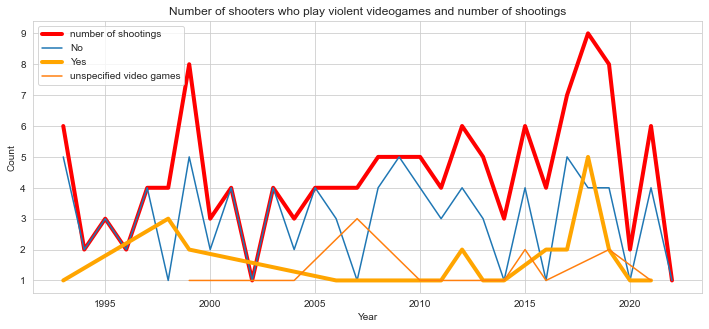

In [311]:
#Compared with 5-year data, This graph (ydearly data) does not reveal the relationship accurately, 
#because you can't even see the increasing trend of # of mass shootings.

# create a figure and axis object
fig, ax1 = plt.subplots(figsize = (12, 5) )

ax1.plot(df_numShootings['Year'], df_numShootings['Count'], label='number of shootings', color = 'r', linewidth = 4)
ax1.plot(df_vvg_no['Year'], df_vvg_no['Count'], label='No')
ax1.plot(df_vvg_yes['Year'], df_vvg_yes['Count'], label='Yes', color = 'orange', linewidth = 4)
ax1.plot(df_vvg_otherGames['Year'], df_vvg_otherGames['Count'], label='unspecified video games')

ax1.legend()


# add axis labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Number of shooters who play violent videogames and number of shootings')


# show the plot
plt.show()


In [87]:
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("0", "No Evidence")
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("1", "Racism")
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("2", "Misogyny")
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("3", "Homophobia")
crime['Known Prejudices\xa0'] = crime['Known Prejudices\xa0'].replace("4", "Religious Hatred")

In [88]:
none = (crime['Known Prejudices\xa0']=="No Evidence").sum()
racism = (crime['Known Prejudices\xa0']=="Racism").sum()
misogyny = (crime['Known Prejudices\xa0']=="Misogyny").sum()
homophobia = (crime['Known Prejudices\xa0']=="Homophobia").sum()
religiousHate = (crime['Known Prejudices\xa0']=="Religious Hatred").sum()

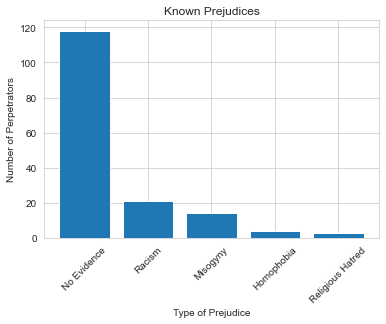

In [89]:
crime2 = crime[crime['Known Prejudices\xa0'].notna()]
x = crime2["Known Prejudices\xa0"]
dict = {'No Evidence':none, 'Racism':racism,'Misogyny':misogyny,'Homophobia':homophobia, 'Religious Hatred':religiousHate}
plt.bar(list(dict.keys()),list(dict.values()) )
plt.title("Known Prejudices")
plt.xticks(rotation=45)
plt.ylabel("Number of Perpetrators")
plt.xlabel("Type of Prejudice")
plt.show()

In [90]:
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("0", "No Evidence")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("1", "Recent break-up")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("2", "Employment stressor")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("3", "Economic stressor")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("4", "Family issue")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("5", "Legal issue")
crime['Recent or Ongoing Stressor'] = crime['Recent or Ongoing Stressor'].replace("6", "Other")
#crime['Recent or Ongoing Stressor']

In [91]:
none = (crime['Recent or Ongoing Stressor']=="No Evidence").sum()
breakup = (crime['Recent or Ongoing Stressor']=="Recent break-up").sum()
employment = (crime['Recent or Ongoing Stressor']=="Employment stressor").sum()
economic = (crime['Recent or Ongoing Stressor']=="Economic stressor").sum()
family = (crime['Recent or Ongoing Stressor']=="Family issue").sum()
legal = (crime['Recent or Ongoing Stressor']=="Legal issue").sum()
other = (crime['Recent or Ongoing Stressor']=="Other").sum()


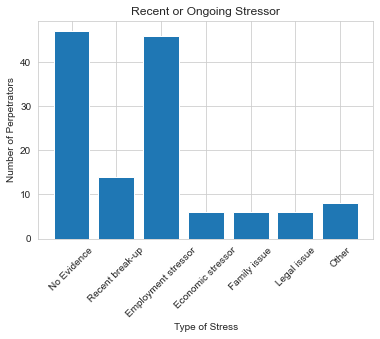

In [92]:
crime2 = crime[crime['Recent or Ongoing Stressor'].notna()]
x = crime2["Recent or Ongoing Stressor"]
dict = {'No Evidence':none, 'Recent break-up':breakup,'Employment stressor':employment,'Economic stressor':economic, 'Family issue':family,'Legal issue':legal,'Other':other}
plt.bar(list(dict.keys()),list(dict.values()) )
#plt.pie(list(dict.keys()),list(dict.values()) )
plt.title("Recent or Ongoing Stressor")
plt.xticks(rotation=45)
plt.ylabel("Number of Perpetrators")
plt.xlabel("Type of Stress")
plt.show()

In [93]:
crime['Adult Trauma'] = crime['Adult Trauma'].replace("0", "No Evidence")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("1", "Death of a parent causing significant distress")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("2", "Death or loss of a child")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("3", "Death of a family member causing significant distress")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("4", "Trauma from war")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("5", "Traumatic accident")
crime['Adult Trauma'] = crime['Adult Trauma'].replace("6", "Other")
#crime['Adult Trauma']

In [94]:
none = (crime['Adult Trauma']=="No Evidence").sum()
parent = (crime['Adult Trauma']=="Death of a parent causing significant distress").sum()
child = (crime['Adult Trauma']=="Death or loss of a child").sum()
family = (crime['Adult Trauma']=="Death of a family member causing significant distress").sum()
war = (crime['Adult Trauma']=="Trauma from war").sum()
accident = (crime['Adult Trauma']=="Traumatic accident").sum()
other = (crime['Adult Trauma']=="Other").sum()
traumalist = (none,parent, child,family,war,accident, other)


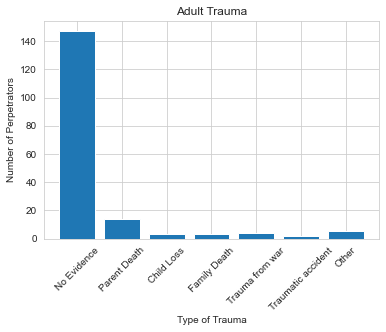

In [95]:
crime2 = crime[crime['Adult Trauma'].notna()]
x = crime2["Adult Trauma"]
dict = {'No Evidence':none, 'Parent Death':parent,'Child Loss':child,'Family Death':family, 'Trauma from war':war,'Traumatic accident':accident,'Other':other}
plt.bar(list(dict.keys()),list(dict.values()) )
#plt.pie(list(dict.keys()),list(dict.values()) )
plt.title("Adult Trauma")
plt.xticks(rotation=45)
plt.ylabel("Number of Perpetrators")
plt.xlabel("Type of Trauma")
plt.show()


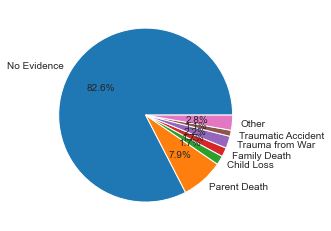

In [96]:
traumalabels = ('No Evidence', 'Parent Death','Child Loss','Family Death','Trauma from War','Traumatic Accident','Other')
plt.pie(traumalist,labels = traumalabels, autopct='%1.1f%%')
plt.show()

In [97]:
crime['Race'] = crime['Race'].replace("0", "White")
crime['Race'] = crime['Race'].replace("1", "Black")
crime['Race'] = crime['Race'].replace("2", "Latinx")
crime['Race'] = crime['Race'].replace("3", "Asian")
crime['Race'] = crime['Race'].replace("4", "Middle Eastern")
crime['Race'] = crime['Race'].replace("5", "Native American")
crime['Race'] = crime['Race'].replace("6", "Other")

In [98]:
white = (crime['Race']=="White").sum()
black = (crime['Race']=="Black").sum()
latinx = (crime['Race']=="Latinx").sum()
asian = (crime['Race']=="Asian").sum()
middleEastern = (crime['Race']=="Middle Eastern").sum()
nativeAmerican = (crime['Race']=="Native American").sum()
other = (crime['Race']=="Other").sum()


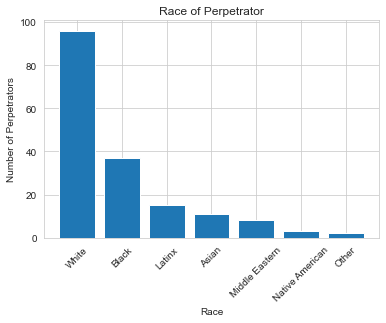

In [99]:
crime2 = crime[crime['Race'].notna()]
x = crime2["Race"]
dict = {'White':white, 'Black':black,'Latinx':latinx,'Asian':asian, 'Middle Eastern':middleEastern,'Native American':nativeAmerican,'Other':other}
plt.bar(list(dict.keys()),list(dict.values()) )

plt.title("Race of Perpetrator")
plt.xticks(rotation=45)
plt.ylabel("Number of Perpetrators")
plt.xlabel("Race")
plt.show()

In [100]:
#1966-2022
crime3["Year"] = pd.to_numeric(crime3["Year"])

crime3['Race'] = crime['Race'].replace("0", "White")
crime3['Race'] = crime['Race'].replace("1", "Black")
crime3['Race'] = crime['Race'].replace("2", "Latinx")
crime3['Race'] = crime['Race'].replace("3", "Asian")
crime3['Race'] = crime['Race'].replace("4", "Middle Eastern")
crime3['Race'] = crime['Race'].replace("5", "Native American")
crime3['Race'] = crime['Race'].replace("6", "Other")

In [101]:
firstDecade = crime3[(crime3["Year"] >= 1966) & (crime3["Year"] <= 1976)]
secondDecade = crime3[(crime3["Year"] >= 1977) & (crime3["Year"] <= 1987)]
thirdDecade = crime3[(crime3["Year"] >= 1988) & (crime3["Year"] <= 1998)]
fourthDecade = crime3[(crime3["Year"] >= 1999) & (crime3["Year"] <= 2009)]
fifthDecade = crime3[(crime3["Year"] >= 2010) & (crime3["Year"] <= 2019)]
sixthDecade = crime3[(crime3["Year"] >= 2020) & (crime3["Year"] <= 2022)]

In [102]:
white1 = (firstDecade['Race']=="White").sum()
black1 = (firstDecade['Race']=="Black").sum()
latinx1 = (firstDecade['Race']=="Latinx").sum()
asian1 = (firstDecade['Race']=="Asian").sum()
middleEastern1 = (firstDecade['Race']=="Middle Eastern").sum()
nativeAmerican1 = (firstDecade['Race']=="Native American").sum()
other1 = (firstDecade['Race']=="Other").sum()

In [103]:
white2 = (secondDecade['Race']=="White").sum()
black2 = (secondDecade['Race']=="Black").sum()
latinx2 = (secondDecade['Race']=="Latinx").sum()
asian2 = (secondDecade['Race']=="Asian").sum()
middleEastern2 = (secondDecade['Race']=="Middle Eastern").sum()
nativeAmerican2 = (secondDecade['Race']=="Native American").sum()
other2 = (secondDecade['Race']=="Other").sum()

In [104]:
white3 = (thirdDecade['Race']=="White").sum()
black3 = (thirdDecade['Race']=="Black").sum()
latinx3 = (thirdDecade['Race']=="Latinx").sum()
asian3 = (thirdDecade['Race']=="Asian").sum()
middleEastern3 = (thirdDecade['Race']=="Middle Eastern").sum()
nativeAmerican3 = (thirdDecade['Race']=="Native American").sum()
other3 = (thirdDecade['Race']=="Other").sum()

In [105]:
white4 = (fourthDecade['Race']=="White").sum()
black4 = (fourthDecade['Race']=="Black").sum()
latinx4 = (fourthDecade['Race']=="Latinx").sum()
asian4 = (fourthDecade['Race']=="Asian").sum()
middleEastern4 = (fourthDecade['Race']=="Middle Eastern").sum()
nativeAmerican4 = (fourthDecade['Race']=="Native American").sum()
other4 = (fourthDecade['Race']=="Other").sum()

In [106]:
white5 = (fifthDecade['Race']=="White").sum()
black5 = (fifthDecade['Race']=="Black").sum()
latinx5 = (fifthDecade['Race']=="Latinx").sum()
asian5 = (fifthDecade['Race']=="Asian").sum()
middleEastern5 = (fifthDecade['Race']=="Middle Eastern").sum()
nativeAmerican5 = (fifthDecade['Race']=="Native American").sum()
other5 = (fifthDecade['Race']=="Other").sum()

In [107]:
white6 = (sixthDecade['Race']=="White").sum()
black6 = (sixthDecade['Race']=="Black").sum()
latinx6 = (sixthDecade['Race']=="Latinx").sum()
asian6 = (sixthDecade['Race']=="Asian").sum()
middleEastern6 = (sixthDecade['Race']=="Middle Eastern").sum()
nativeAmerican6 = (sixthDecade['Race']=="Native American").sum()
other6 = (sixthDecade['Race']=="Other").sum()

In [108]:
perpetratorRace = {'Group' : ['1966 - 1976', '1966 - 1976', '1966 - 1976', '1966 - 1976','1966 - 1976', '1966 - 1976', '1966 - 1976', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2020-2022', '2020-2022', '2020-2022','2020-2022', '2020-2022', '2020-2022', '2020-2022'],
                'Category': ['White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other'],
                'Value' : [white1, black1, latinx1, asian1, middleEastern1, nativeAmerican1, other1, white2, black2, latinx2, asian2, middleEastern2, nativeAmerican2, other2, white3, black3, latinx3, asian3, middleEastern3, nativeAmerican3, other3, white4, black4, latinx4, asian4, middleEastern4, nativeAmerican4, other4, white5, black5, latinx5, asian5, middleEastern5, nativeAmerican5, other5, white6, black6, latinx6, asian6, middleEastern6, nativeAmerican6, other6]}


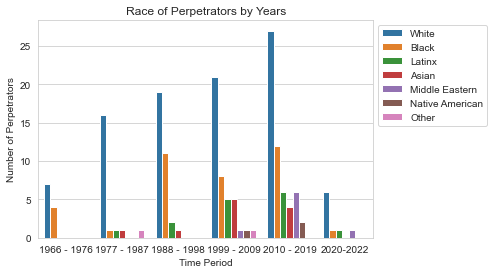

In [109]:
sns.set_style("whitegrid")

plt.title("Race of Perpetrators by Years")  #Change 2010-2019, and 2020-2022
plt.xlabel("Time Period")
plt.ylabel("Number of Perpetrators")
ax = sns.barplot(x='Group', y='Value', hue='Category', data= perpetratorRace)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#Markdown Cell
1966-1976: 11years, 11 perpetrators -- 1.00 Perpetrators per year
1977-1987: 11years, 20 perpetrators -- 1.82 Perpetrators per year
1988-1998: 11years, 33 perpetrators -- 3.00 Perpetrators per year
1999-2009: 11years, 42 perpetrators -- 3.82 Perpetrators per year
2010-2019: 10years, 57 perpetrators -- 5.70 Perpetrators per year
2020-2022: 3 years,  9 perpetrators -- 3.00 Perpetrators per year

In [110]:
victims = pd.read_csv("victims.csv", sep=",")
victims.head()

Case # Shooter Last Name Shooter First Name Full Date  \
0      1           Whitman            Charles  8/1/1966   
1      1           Whitman            Charles  8/1/1966   
2      1           Whitman            Charles  8/1/1966   
3      1           Whitman            Charles  8/1/1966   
4      1           Whitman            Charles  8/1/1966   

                Victim Name   Age  Gender  Race  Knew Shooter  \
0  Kathleen "Kathy" Whitman  23.0     1.0   0.0           1.0   
1          Margaret Whitman  43.0     1.0   0.0           1.0   
2      Martin "Mark" Gabour  16.0     0.0   2.0           0.0   
3        Marguerite Lamport  45.0     1.0   0.0           0.0   
4   Edna Elizabeth Townsley  51.0     1.0   0.0           2.0   

  If Known, Relationship to Shooter  ...  Unnamed: 17  Unnamed: 18  \
0                              wife  ...          NaN          NaN   
1                            mother  ...          NaN          NaN   
2                               NaN  ...          NaN          NaN   
3                               NaN  ...          NaN          NaN   
4                employee on campus  ...          NaN          NaN   

  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  \
0         NaN          NaN          NaN          NaN          NaN   
1         NaN          NaN          NaN          NaN          NaN   
2         NaN          NaN          NaN          NaN          NaN   
3         NaN          NaN          NaN          NaN          NaN   
4         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 24  Unnamed: 25  Unnamed: 26  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 27 columns]

In [111]:
victims['Full Date'] = victims['Full Date'].astype(str)

In [112]:
victims['Date'] = victims['Full Date'].str[-4:]
victims = victims[:-143]

In [113]:
victims['Date']

0       1966
1       1966
2       1966
3       1966
4       1966
        ... 
1262    2022
1263    2022
1264    2022
1265    2022
1266    2022
Name: Date, Length: 1267, dtype: object

In [114]:
victims['Race'] = pd.to_numeric(victims['Race'], errors='coerce').convert_dtypes() 
victims['Date'] = pd.to_numeric(victims['Date'])

In [115]:
victims2 = victims[victims['Race'].notna()]

In [116]:

#victims2['Race'] = victims2['Race'].replace("0", "White")
#victims2['Race'] = victims2['Race'].replace("1", "Black")
#victims2['Race'] = victims2['Race'].replace("2", "Latinx")
#victims2['Race'] = victims2['Race'].replace("3", "Asian")
#victims2['Race'] = victims2['Race'].replace("4", "Middle Eastern")
#victims2['Race'] = victims2['Race'].replace("5", "Native American")
#victims2['Race'] = victims2['Race'].replace("6", "Other")

In [117]:
firstdecade = victims2[(victims2["Date"] >= 1966) & (victims2["Date"] <= 1976)]
seconddecade = victims2[(victims2["Date"] >= 1977) & (victims2["Date"] <= 1987)]
thirddecade = victims2[(victims2["Date"] >= 1988) & (victims2["Date"] <= 1998)]
fourthdecade = victims2[(victims2["Date"] >= 1999) & (victims2["Date"] <= 2009)]
fifthdecade = victims2[(victims2["Date"] >= 2010) & (victims2["Date"] <= 2019)]
sixthdecade = victims2[(victims2["Date"] >= 2020) & (victims2["Date"] <= 2022)]


In [118]:
white1 = (firstdecade['Race']==0).sum()
black1 = (firstdecade['Race']==1).sum()
latinx1 = (firstdecade['Race']==2).sum()
asian1 = (firstdecade['Race']==3).sum()
middleEastern1 = (firstdecade['Race']==4).sum()
nativeAmerican1 = (firstdecade['Race']==5).sum()
other1 = (firstdecade['Race']==6).sum()

In [119]:
white2 = (seconddecade['Race']==0).sum()
black2 = (seconddecade['Race']==1).sum()
latinx2 = (seconddecade['Race']==2).sum()
asian2 = (seconddecade['Race']==3).sum()
middleEastern2 = (seconddecade['Race']==4).sum()
nativeAmerican2 = (seconddecade['Race']==5).sum()
other2 = (seconddecade['Race']==6).sum()

In [120]:
white3 = (thirddecade['Race']==0).sum()
black3 = (thirddecade['Race']==1).sum()
latinx3 = (thirddecade['Race']==2).sum()
asian3 = (thirddecade['Race']==3).sum()
middleEastern3 = (thirddecade['Race']==4).sum()
nativeAmerican3 = (thirddecade['Race']==5).sum()
other3 = (thirddecade['Race']==6).sum()

In [121]:
white4 = (fourthdecade['Race']==0).sum()
black4 = (fourthdecade['Race']==1).sum()
latinx4 = (fourthdecade['Race']==2).sum()
asian4 = (fourthdecade['Race']==3).sum()
middleEastern4 = (fourthdecade['Race']==4).sum()
nativeAmerican4 = (fourthdecade['Race']==5).sum()
other4 = (fourthdecade['Race']==6).sum()

In [122]:
white5 = (fifthdecade['Race']==0).sum()
black5 = (fifthdecade['Race']==1).sum()
latinx5 = (fifthdecade['Race']==2).sum()
asian5 = (fifthdecade['Race']==3).sum()
middleEastern5 = (fifthdecade['Race']==4).sum()
nativeAmerican5 = (fifthdecade['Race']==5).sum()
other5 = (fifthdecade['Race']==6).sum()


In [123]:
white6 = (sixthdecade['Race']==0).sum()
black6 = (sixthdecade['Race']==1).sum()
latinx6 = (sixthdecade['Race']==2).sum()
asian6 = (sixthdecade['Race']==3).sum()
middleEastern6 = (sixthdecade['Race']==4).sum()
nativeAmerican6 = (sixthdecade['Race']==5).sum()
other6 = (sixthdecade['Race']==6).sum()

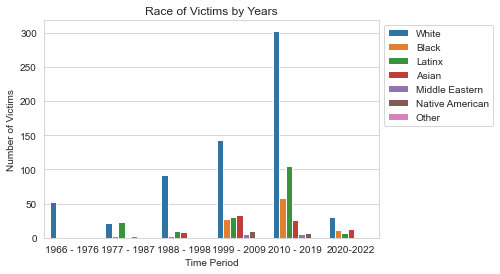

In [124]:
victimRace = {'Group' : ['1966 - 1976', '1966 - 1976', '1966 - 1976', '1966 - 1976','1966 - 1976', '1966 - 1976', '1966 - 1976', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1977 - 1987', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1988 - 1998', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '1999 - 2009', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2010 - 2019', '2020-2022', '2020-2022', '2020-2022','2020-2022', '2020-2022', '2020-2022', '2020-2022'],
                'Category': ['White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other', 'White','Black','Latinx', 'Asian', 'Middle Eastern', 'Native American', 'Other'],
                'Value' : [white1, black1, latinx1, asian1, middleEastern1, nativeAmerican1, other1, white2, black2, latinx2, asian2, middleEastern2, nativeAmerican2, other2, white3, black3, latinx3, asian3, middleEastern3, nativeAmerican3, other3, white4, black4, latinx4, asian4, middleEastern4, nativeAmerican4, other4, white5, black5, latinx5, asian5, middleEastern5, nativeAmerican5, other5, white6, black6, latinx6, asian6, middleEastern6, nativeAmerican6, other6]}

sns.set_style("whitegrid")

plt.title("Race of Victims by Years")
plt.xlabel("Time Period")
plt.ylabel("Number of Victims")
ax = sns.barplot(x='Group', y='Value', hue='Category', data= victimRace)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

In [125]:
firstDecade = crime3[(crime3["Year"] >= 1966) & (crime3["Year"] <= 1976)]
secondDecade = crime3[(crime3["Year"] >= 1977) & (crime3["Year"] <= 1987)]
thirdDecade = crime3[(crime3["Year"] >= 1988) & (crime3["Year"] <= 1998)]
fourthDecade = crime3[(crime3["Year"] >= 1999) & (crime3["Year"] <= 2009)]
fifthDecade = crime3[(crime3["Year"] >= 2010) & (crime3["Year"] <= 2018)]
sixthDecade = crime3[(crime3["Year"] >= 2019) & (crime3["Year"] <= 2022)]

In [126]:
#Number Killed
#Number Injured
crime3['Number Killed'] = pd.to_numeric(crime3['Number Killed'], errors='coerce').convert_dtypes() 
crime3['Number Injured'] = pd.to_numeric(crime3['Number Injured'], errors='coerce').convert_dtypes() 

In [127]:

crime4 = crime3[crime3['Number Killed'].notna()]
crime4 = crime3[crime3['Number Injured'].notna()]

In [128]:
firstDecade = crime4[(crime4["Year"] >= 1966) & (crime4["Year"] <= 1976)]
secondDecade = crime4[(crime4["Year"] >= 1977) & (crime4["Year"] <= 1987)]
thirdDecade = crime4[(crime4["Year"] >= 1988) & (crime4["Year"] <= 1998)]
fourthDecade = crime4[(crime4["Year"] >= 1999) & (crime4["Year"] <= 2009)]
fifthDecade = crime4[(crime4["Year"] >= 2010) & (crime4["Year"] <= 2019)]
sixthDecade = crime4[(crime4["Year"] >= 2020) & (crime4["Year"] <= 2022)]

In [129]:
killed1 = sum(firstDecade['Number Killed'])
injured1 = sum(firstDecade['Number Injured'])
killed2 = sum(secondDecade['Number Killed'])
injured2 = sum(secondDecade['Number Injured'])
killed3 = sum(thirdDecade['Number Killed'])
injured3 = sum(thirdDecade['Number Injured'])
killed4 = sum(fourthDecade['Number Killed'])
injured4 = sum(fourthDecade['Number Injured'])
killed5 = sum(fifthDecade['Number Killed'])
injured5 = sum(fifthDecade['Number Injured'])
killed6 = sum(sixthDecade['Number Killed'])
injured6 = sum(sixthDecade['Number Injured'])


In [130]:
victimCounts = {'Group' : ['1966 - 1976', '1966 - 1976', '1977 - 1987', '1977 - 1987', '1988 - 1998', '1988 - 1998', '1999 - 2009', '1999 - 2009', '2010 - 2019', '2010 - 2019', '2020-2022', '2020-2022'],
                'Category': ['Killed', 'Injured', 'Killed', 'Injured', 'Killed', 'Injured', 'Killed', 'Injured', 'Killed', 'Injured', 'Killed', 'Injured'],
                'Value' : [killed1, injured1, killed2, injured2, killed3, injured3, killed4, injured4, killed5, injured5, killed6, injured6]}

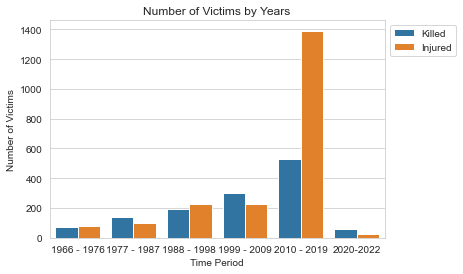

In [131]:

sns.set_style("whitegrid")

plt.title("Number of Victims by Years")  #Change 2010-2018, and 2019-2022
plt.xlabel("Time Period")
plt.ylabel("Number of Victims")
ax = sns.barplot(x='Group', y='Value', hue='Category', data= victimCounts)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

#Markdown Cell
1966-1976: 11years, 150 victims -- 13.64 victims per year (70 killed, 80 injured)
1977-1987: 11years, 241 victims -- 21.91 victims per year (142 killed, 99 injured)
1988-1998: 11years, 420 victims -- 38.18 victims per year (196 killed, 225 injured)
1999-2009: 11years, 530 victims -- 48.18 victims per year (302 killed, 228 injured)
2010-2019: 10years, 1,923 victims -- 192.30 victims per year (532 killed, 1391 injured)
2020-2022: 3 years, 85 victims -- 28.33 victims per year (62 killed, 23 injured)

In [132]:
import plotly.express as px
import plotly.graph_objects as go


In [133]:
BubbleCrime = crime[["Year", "State", "State Code"]].copy()

In [134]:
BubbleCrime_Agg = BubbleCrime.groupby(["Year", "State", "State Code"]).count().reset_index()

In [135]:
BubbleCrime["Year"] = pd.to_numeric(BubbleCrime["Year"], errors='coerce').convert_dtypes() 

In [136]:
firstDecade = BubbleCrime[(BubbleCrime["Year"] >= 1966) & (BubbleCrime["Year"] <= 1976)]
secondDecade = BubbleCrime[(BubbleCrime["Year"] >= 1977) & (BubbleCrime["Year"] <= 1987)]
thirdDecade = BubbleCrime[(BubbleCrime["Year"] >= 1988) & (BubbleCrime["Year"] <= 1998)]
fourthDecade = BubbleCrime[(BubbleCrime["Year"] >= 1999) & (BubbleCrime["Year"] <= 2009)]
fifthDecade = BubbleCrime[(BubbleCrime["Year"] >= 2010) & (BubbleCrime["Year"] <= 2019)]
sixthDecade = BubbleCrime[(BubbleCrime["Year"] >= 2020) & (BubbleCrime["Year"] <= 2022)]

In [137]:
BubbleCrime.head()

0  Year State State Code
1  1966    TX         43
2  1966    AZ          3
3  1967    PA         38
4  1968    MI         22
5  1969    PA         38

In [138]:
crime.head()

0 Case # Shooter Last Name Shooter First Name   Full Date Day of Week Day  \
1      1           Whitman            Charles    8/1/1966      Monday   1   
2      2             Smith             Robert  11/12/1966    Saturday  12   
3      3              Held                Leo  10/23/1967      Monday  23   
4      4           Pearson               Eric   3/16/1968    Saturday  16   
5      5         Lambright             Donald    4/5/1969    Saturday   5   

0 Month  Year                      Shooting Location Address        City  ...  \
1     8  1966       110 Inner Campus Drive, Austin, TX 78705      Austin  ...   
2    11  1966         Rose-Mar College of Beauty in Mesa, AZ        Mesa  ...   
3    10  1967  599 South Highland Street Lockhaven, PA 17745  Lock Haven  ...   
4     3  1968              11703 Lake Rd, Ironwood, MI 49938    Ironwood  ...   
5     4  1969      Pennsylvania Turnpike near Harrisburg, PA  Harrisburg  ...   

0 Planning Performance Interest in Firearms Firearm Proficiency  \
1        1           0                    1                   3   
2        1           1                    0                   1   
3        0           0                    1                   3   
4        0           0                    0                   0   
5        0           0                    0                   3   

0 Total Firearms Brought to the Scene Other Weapons or Gear On-Scene Outcome  \
1                                   7                     1                1   
2                                   1                     1                2   
3                                   2                     1                1   
4                                   1                     0                2   
5                                   2                     0                0   

0 Attempt to Flee Insanity Defense Criminal Sentence  
1               0                2                 0  
2               0                1                 1  
3               0                2                 0  
4               0                0                 3  
5               0                2                 0  

[5 rows x 136 columns]

In [139]:
BubbleCrime2 = BubbleCrime.groupby(['Year', 'State'])['State Code'].count().reset_index(name='Count')

In [140]:
print(BubbleCrime2['Year'].dtype)

Int64


In [141]:
def changeYear(year):
    if (1960 <= year <= 1969):
        return '1960 ~ 1969'
    elif (1970 <= year <= 1979):
        return '1970 ~ 1979'
    elif (1980 <= year <= 1989):
        return '1980 ~ 1989'
    elif (1990 <= year <= 1999):
        return '1990 ~ 1999'  
    elif (2000 <= year <= 2009):
        return '2000 ~ 2009'
    elif (2010 <= year <= 2019):
        return '2010 ~ 2019'
    else: #if (2020 <= year <= 2022):
        return '2020 ~ 2022'

In [142]:
BubbleCrime3 = BubbleCrime2.copy()

In [143]:
BubbleCrime3['Year'] = BubbleCrime3['Year'].apply(changeYear)
BubbleCrime3.head(10)

Year State  Count
0  1960 ~ 1969    AZ      1
1  1960 ~ 1969    TX      1
2  1960 ~ 1969    PA      1
3  1960 ~ 1969    MI      1
4  1960 ~ 1969    PA      1
5  1970 ~ 1979    NY      1
6  1970 ~ 1979    NC      1
7  1970 ~ 1979    NJ      1
8  1970 ~ 1979    LA      1
9  1970 ~ 1979    CA      1

# Aggregate data by state
#df_agg = crime3.groupby(["State Code", "State"]).sum().reset_index()

limits = [1,2,3,4,5]
colors = ["#CC0000","#CE1620","#E34234","#CD5C5C","#FF0000"]

# Create bubble chart
fig = px.scatter_geo(BubbleCrime3, locations="State", locationmode="USA-states", 
                     size= "Count", color= "Count",
                     hover_name="State", text="Count",
                     projection="albers usa", scope="usa", animation_frame="Year",
                     title="Total Count of Mass Shootings by State",
                    width = 800,
                    height = 600)

fig.update_traces(marker=dict(colorscale="YlOrRd", colorbar= dict(title="Count per Decade", nticks=5, tickformat=".0f")))


# Show figure
fig.show()

BubbleCrime3['text'] = BubbleCrime3['State'] + '<br>Count = ' + BubbleCrime3['Count'].astype(str)
limits = [(0,1),(2,3),(3,3),(4,4),(5,5)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = BubbleCrime3[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Count'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

COHERENCE SCORES

In [144]:
STOPWORDS.add('nan')
print(STOPWORDS)

{'what', "you'll", 'again', 'itself', "we're", 'below', "let's", 'here', 'k', "why's", 'out', "they've", "haven't", "i've", "who's", 'a', 'but', 'them', 'few', 'herself', "there's", 'our', 'there', 'nan', "won't", 'all', 'of', 'down', "how's", 'by', 'and', 'like', 'on', 'when', "you've", "that's", "here's", 'i', 'have', "isn't", 'very', 'my', 'through', 'would', 'than', 'while', 'with', 'can', "hasn't", 'too', 'own', "he'll", 'doing', 'above', 'has', "shouldn't", "when's", "doesn't", 'where', 'further', 'then', 'ever', "don't", 'how', 'off', "shan't", 'their', "they're", 'http', 'from', 'since', "they'd", 'been', 'being', 'hers', 'if', "she'd", 'before', 'yourselves', 'these', "didn't", 'his', 'not', 'only', 'most', 'else', 'however', 'in', "you're", "they'll", 'me', 'about', 'this', 'under', "he's", "hadn't", 'because', 'against', 'otherwise', 'both', 'other', 'into', 'between', 'had', 'he', 'therefore', "weren't", 'who', 'your', 'www', 'same', "i'll", "i'd", 'should', "we've", "what'

School Coherence

In [145]:
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary


# Load the data into a pandas dataframe
df = pd.read_csv('violenceprojectfulldatabase.csv', sep=',')

df.columns = df.iloc[0] #Make the first row the header
df = df.iloc[1:, :] #Drop the first row

df['School Performance Specified'] = df['School Performance Specified'].astype(str)
df['School Performance Specified'] = df['School Performance Specified'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (STOPWORDS)]))
# Preprocess the text data
data_words = df['School Performance Specified'].apply(lambda x: simple_preprocess(x))  #name one column and input real data

# Create a dictionary representation of the documents
dictionary = Dictionary(data_words)

# Create a bag-of-words representation of the documents and save to variable corpus
corpus = [dictionary.doc2bow(doc) for doc in data_words]


In [146]:
from gensim import corpora, models
# Apply tf-idf weighting to the bag of words representation
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [147]:
from gensim.models import CoherenceModel
# Train an LDA model on the tf-idf weighted corpus
#num_topics = 2
#lda_model = models.LdaModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=10)
#
## Print the top words in each topic
#for i, topic in lda_model.show_topics(num_topics=num_topics):
#    print("Topic", i+1, ":", topic)
# Compute coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Print the coherence scores for different numbers of topics
for num_topics, coherence_score in coherence_scores:
    print(f"Number of topics: {num_topics}   Coherence score: {coherence_score}")


Number of topics: 2   Coherence score: 0.7029763669332688
Number of topics: 3   Coherence score: 0.6803722583456685
Number of topics: 4   Coherence score: 0.6520238336071884
Number of topics: 5   Coherence score: 0.6470074061252203
Number of topics: 6   Coherence score: 0.6153275668027943
Number of topics: 7   Coherence score: 0.6043490077933938
Number of topics: 8   Coherence score: 0.5699139700796163
Number of topics: 9   Coherence score: 0.5777514219410043
Number of topics: 10   Coherence score: 0.5884737616551498


In [148]:
# Define the number of topics and train the LDA model
num_topics = 2
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics)

# Print the generated topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
   
# Evaluate the model's coherence score
coherence_score = gensim.models.CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v').get_coherence()
print('Coherence Score: ', coherence_score)

Topic: 0 
Words: 0.031*"school" + 0.030*"student" + 0.023*"grades" + 0.022*"high" + 0.021*"college" + 0.018*"gpa" + 0.016*"degree" + 0.016*"good" + 0.015*"dropout" + 0.014*"top"
Topic: 1 
Words: 0.037*"gpa" + 0.029*"good" + 0.026*"student" + 0.023*"grades" + 0.022*"high" + 0.020*"school" + 0.020*"average" + 0.019*"dropout" + 0.012*"mostly" + 0.012*"th"
Coherence Score:  0.6611362337824025


### SCHOOL BIGRAM COHERENCE

In [149]:
schoolcobigram = df['School Performance Specified'].apply(get_ngrams, n=2)

In [150]:

# Preprocess the text data
data_words = schoolcobigram.apply(lambda x: simple_preprocess(x))  #name one column and input real data

# Create a dictionary representation of the documents
dictionary = Dictionary(data_words)

# Create a bag-of-words representation of the documents and save to variable corpus
corpus = [dictionary.doc2bow(doc) for doc in data_words]


In [151]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [152]:
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Print the coherence scores for different numbers of topics
for num_topics, coherence_score in coherence_scores:
    print(f"Number of topics: {num_topics}   Coherence score: {coherence_score}")


Number of topics: 2   Coherence score: 0.7803911135729391
Number of topics: 3   Coherence score: 0.7519406742595577
Number of topics: 4   Coherence score: 0.7151612027479333
Number of topics: 5   Coherence score: 0.6628875629242026
Number of topics: 6   Coherence score: 0.6359423468452217
Number of topics: 7   Coherence score: 0.6155932847446597
Number of topics: 8   Coherence score: 0.6130291253146644
Number of topics: 9   Coherence score: 0.6613727638546875
Number of topics: 10   Coherence score: 0.6406839186717354


In [153]:
# Define the number of topics and train the LDA model
num_topics = 2
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics)

# Print the generated topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
   
# Evaluate the model's coherence score
coherence_score = gensim.models.CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v').get_coherence()
print('Coherence Score: ', coherence_score)

Topic: 0 
Words: 0.021*"good_grades" + 0.021*"good_student" + 0.020*"high_school" + 0.015*"grades" + 0.013*"school_dropout" + 0.013*"gpa" + 0.013*"th" + 0.011*"school" + 0.011*"assumed_good" + 0.010*"excelled_school"
Topic: 1 
Words: 0.031*"high_school" + 0.026*"school_dropout" + 0.017*"good_student" + 0.013*"dean" + 0.013*"average_grades" + 0.013*"grades" + 0.012*"poor_student" + 0.012*"s_list" + 0.012*"th_grade" + 0.011*"good_grades"
Coherence Score:  0.7634135406061959


Community Coherence

In [154]:
df['Community Involvement Specified'] = df['Community Involvement Specified'].astype(str)
df['Community Involvement Specified'] = df['Community Involvement Specified'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
# Preprocess the text data
data_comwords = df['Community Involvement Specified'].apply(lambda x: simple_preprocess(x))  #name one column and input real data

# Create a dictionary representation of the documents
dictionarycom = Dictionary(data_comwords)

# Create a bag-of-words representation of the documents and save to variable corpus
comcorpus = [dictionarycom.doc2bow(doc) for doc in data_comwords]


In [155]:
# Apply tf-idf weighting to the bag of words representation
comtfidf = models.TfidfModel(comcorpus)
comcorpus_tfidf = comtfidf[comcorpus]

In [156]:
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = gensim.models.LdaMulticore(comcorpus_tfidf, num_topics=num_topics, id2word=dictionarycom, passes=10, workers=2)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_comwords, dictionary=dictionarycom, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Print the coherence scores for different numbers of topics
for num_topics, coherence_score in coherence_scores:
    print(f"Number of topics: {num_topics}   Coherence score: {coherence_score}")

Number of topics: 2   Coherence score: 0.6456811576492507
Number of topics: 3   Coherence score: 0.619081696272417
Number of topics: 4   Coherence score: 0.6088895687132728
Number of topics: 5   Coherence score: 0.5959157762033069
Number of topics: 6   Coherence score: 0.5309719803668398
Number of topics: 7   Coherence score: 0.5488218650765618
Number of topics: 8   Coherence score: 0.5640035049772352
Number of topics: 9   Coherence score: 0.5406651638342893
Number of topics: 10   Coherence score: 0.5263019583696504


In [157]:
# Define the number of topics and train the LDA model
num_topics = 3
lda_model = LdaModel(corpus=comcorpus_tfidf, id2word=dictionarycom, num_topics=num_topics)

# Print the generated topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
   
# Evaluate the model's coherence score
coherence_score = gensim.models.CoherenceModel(model=lda_model, texts=data_comwords, dictionary=dictionarycom, coherence='c_v').get_coherence()
print('Coherence Score: ', coherence_score)

Topic: 0 
Words: 0.022*"community" + 0.020*"cultural" + 0.020*"sports" + 0.019*"boy" + 0.016*"involved" + 0.015*"church" + 0.014*"formerly" + 0.013*"scouts" + 0.013*"team" + 0.013*"member"
Topic: 1 
Words: 0.045*"church" + 0.030*"mosque" + 0.026*"school" + 0.024*"events" + 0.021*"neighbors" + 0.020*"band" + 0.013*"frequent" + 0.012*"helpful" + 0.012*"customer" + 0.012*"involved"
Topic: 2 
Words: 0.043*"neighborhood" + 0.038*"community" + 0.023*"involved" + 0.021*"formerly" + 0.020*"church" + 0.020*"helpful" + 0.016*"group" + 0.014*"volunteered" + 0.014*"active" + 0.012*"became"
Coherence Score:  0.6483746575307433


### Community Bigram Coherence

In [158]:
comcobigram = df['Community Involvement Specified'].apply(get_ngrams, n=2)

In [159]:

# Preprocess the text data
data_comwords = comcobigram.apply(lambda x: simple_preprocess(x))  #name one column and input real data

# Create a dictionary representation of the documents
dictionarycom = Dictionary(data_comwords)

# Create a bag-of-words representation of the documents and save to variable corpus
comcorpus = [dictionarycom.doc2bow(doc) for doc in data_comwords]


In [160]:
# Apply tf-idf weighting to the bag of words representation
comtfidf = models.TfidfModel(comcorpus)
comcorpus_tfidf = comtfidf[comcorpus]

In [161]:
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = gensim.models.LdaMulticore(comcorpus_tfidf, num_topics=num_topics, id2word=dictionarycom, passes=10, workers=2)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_comwords, dictionary=dictionarycom, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Print the coherence scores for different numbers of topics
for num_topics, coherence_score in coherence_scores:
    print(f"Number of topics: {num_topics}   Coherence score: {coherence_score}")

Number of topics: 2   Coherence score: 0.7375333811216532
Number of topics: 3   Coherence score: 0.6969309586055633
Number of topics: 4   Coherence score: 0.6061415901758054
Number of topics: 5   Coherence score: 0.6036904444783502
Number of topics: 6   Coherence score: 0.6301636962048118
Number of topics: 7   Coherence score: 0.5986674726151974
Number of topics: 8   Coherence score: 0.6150816708287481
Number of topics: 9   Coherence score: 0.6114487336594556
Number of topics: 10   Coherence score: 0.6375357789555262


In [162]:
# Define the number of topics and train the LDA model
num_topics = 2
lda_model = LdaModel(corpus=comcorpus_tfidf, id2word=dictionarycom, num_topics=num_topics)

# Print the generated topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
   
# Evaluate the model's coherence score
coherence_score = gensim.models.CoherenceModel(model=lda_model, texts=data_comwords, dictionary=dictionarycom, coherence='c_v').get_coherence()
print('Coherence Score: ', coherence_score)

Topic: 0 
Words: 0.021*"school_events" + 0.016*"church" + 0.014*"boy_scouts" + 0.013*"youth_group" + 0.012*"animal_shelter" + 0.012*"mosque" + 0.011*"therapy_group" + 0.011*"customers" + 0.011*"high_school" + 0.011*"scouts"
Topic: 1 
Words: 0.022*"formerly_active" + 0.015*"customer_tavern" + 0.014*"hmong_cultural" + 0.013*"high_school" + 0.013*"member" + 0.012*"regularly_went" + 0.012*"football_team" + 0.012*"school_events" + 0.011*"team" + 0.011*"went_bars"
Coherence Score:  0.7881660092524501


Signs of Crisis Coherence

In [163]:
df['Signs of Crisis Expanded'] = df['Signs of Crisis Expanded'].astype(str)
df['Signs of Crisis Expanded'] = df['Signs of Crisis Expanded'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
# Preprocess the text data
data_criwords = df['Signs of Crisis Expanded'].apply(lambda x: simple_preprocess(x))  #name one column and input real data

# Create a dictionary representation of the documents
dictionarycri = Dictionary(data_criwords)

# Create a bag-of-words representation of the documents and save to variable corpus
cricorpus = [dictionarycri.doc2bow(doc) for doc in data_criwords]


In [164]:
# Apply tf-idf weighting to the bag of words representation
critfidf = models.TfidfModel(cricorpus)
cricorpus_tfidf = critfidf[cricorpus]

In [165]:
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = gensim.models.LdaMulticore(cricorpus_tfidf, num_topics=num_topics, id2word=dictionarycri, passes=10, workers=2)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_criwords, dictionary=dictionarycri, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Print the coherence scores for different numbers of topics
for num_topics, coherence_score in coherence_scores:
    print(f"Number of topics: {num_topics}   Coherence score: {coherence_score}")

Number of topics: 2   Coherence score: 0.22294216519988297
Number of topics: 3   Coherence score: 0.23610228777605302
Number of topics: 4   Coherence score: 0.2297286498308641
Number of topics: 5   Coherence score: 0.27343648938717763
Number of topics: 6   Coherence score: 0.2871329911723377
Number of topics: 7   Coherence score: 0.30281849466167277
Number of topics: 8   Coherence score: 0.3429959774347476
Number of topics: 9   Coherence score: 0.339948528504186
Number of topics: 10   Coherence score: 0.362993224976607


In [166]:
# Define the number of topics and train the LDA model
num_topics = 2
lda_model = LdaModel(corpus=cricorpus_tfidf, id2word=dictionarycri, num_topics=num_topics)

# Print the generated topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
   
# Evaluate the model's coherence score
coherence_score = gensim.models.CoherenceModel(model=lda_model, texts=data_criwords, dictionary=dictionarycri, coherence='c_v').get_coherence()
print('Coherence Score: ', coherence_score)

Topic: 0 
Words: 0.007*"he" + 0.004*"shooting" + 0.003*"months" + 0.003*"in" + 0.003*"years" + 0.002*"wife" + 0.002*"people" + 0.002*"his" + 0.002*"told" + 0.002*"girlfriend"
Topic: 1 
Words: 0.005*"shooting" + 0.005*"he" + 0.003*"him" + 0.003*"wife" + 0.003*"his" + 0.003*"years" + 0.002*"months" + 0.002*"job" + 0.002*"weeks" + 0.002*"fired"
Coherence Score:  0.20439241139345204


### Signs of Crisis Bigram Coherence

In [167]:
cricobigram = df['Signs of Crisis Expanded'].apply(get_ngrams, n=2)

In [168]:
# Preprocess the text data
data_criwords = cricobigram.apply(lambda x: simple_preprocess(x))  #name one column and input real data

# Create a dictionary representation of the documents
dictionarycri = Dictionary(data_criwords)

# Create a bag-of-words representation of the documents and save to variable corpus
cricorpus = [dictionarycri.doc2bow(doc) for doc in data_criwords]


In [169]:
# Apply tf-idf weighting to the bag of words representation
critfidf = models.TfidfModel(cricorpus)
cricorpus_tfidf = critfidf[cricorpus]

In [170]:
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = gensim.models.LdaMulticore(cricorpus_tfidf, num_topics=num_topics, id2word=dictionarycri, passes=10, workers=2)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_criwords, dictionary=dictionarycri, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Print the coherence scores for different numbers of topics
for num_topics, coherence_score in coherence_scores:
    print(f"Number of topics: {num_topics}   Coherence score: {coherence_score}")

Number of topics: 2   Coherence score: 0.4649669322260668
Number of topics: 3   Coherence score: 0.47452117342344186
Number of topics: 4   Coherence score: 0.5586884828489862
Number of topics: 5   Coherence score: 0.4935265124524163
Number of topics: 6   Coherence score: 0.5244796249707424
Number of topics: 7   Coherence score: 0.45158035061381596
Number of topics: 8   Coherence score: 0.4479727056245378
Number of topics: 9   Coherence score: 0.43262036558298117
Number of topics: 10   Coherence score: 0.4235537801220636


In [172]:
# Define the number of topics and train the LDA model
num_topics = 4
lda_model = LdaModel(corpus=cricorpus_tfidf, id2word=dictionarycri, num_topics=num_topics)

# Print the generated topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
   
# Evaluate the model's coherence score
coherence_score = gensim.models.CoherenceModel(model=lda_model, texts=data_criwords, dictionary=dictionarycri, coherence='c_v').get_coherence()
print('Coherence Score: ', coherence_score)

Topic: 0 
Words: 0.002*"shooting" + 0.001*"mental_health" + 0.001*"months_shooting" + 0.001*"years" + 0.001*"before" + 0.001*"recent_breakup" + 0.001*"he_stopped" + 0.001*"six_months" + 0.001*"violence" + 0.001*"her"
Topic: 1 
Words: 0.003*"shooting" + 0.002*"months_shooting" + 0.001*"people" + 0.001*"weeks_shooting" + 0.001*"days_shooting" + 0.001*"day_shooting" + 0.001*"he_told" + 0.001*"he_felt" + 0.001*"he_previously" + 0.001*"quit_job"
Topic: 2 
Words: 0.003*"shooting" + 0.003*"years_shooting" + 0.001*"his_wife" + 0.001*"ex" + 0.001*"girlfriend" + 0.001*"he_always" + 0.001*"months_shooting" + 0.001*"in" + 0.001*"him" + 0.001*"wife_left"
Topic: 3 
Words: 0.003*"shooting" + 0.002*"weeks_shooting" + 0.002*"wife_left" + 0.001*"months_shooting" + 0.001*"his_wife" + 0.001*"days_shooting" + 0.001*"him" + 0.001*"day_shooting" + 0.001*"paranoid" + 0.001*"night_shooting"
Coherence Score:  0.48792193477563417


In [179]:
import pyLDAvis.gensim_models
import pyLDAvis
import gensim
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

PYLDAVIS for School

In [180]:
# Load the data and preprocess it
data = data_words
dictionarypylschool = Dictionary(data)
corpus = [dictionarypylschool.doc2bow(doc) for doc in data]


In [181]:
# Train an LDA model on the corpus
lda_modelpyl = LdaModel(corpus=corpus,
                     id2word=dictionarypylschool,
                     num_topics=3, #Topics = 3 because highest coherence score
                     passes=10)


In [182]:
# Visualize the results using PyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_modelpyl, corpus, dictionary= dictionarypylschool)
pyLDAvis.display(vis)

TypeError: drop() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
testingschool = df['School Performance Specified']
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(testingschool)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(testingschool)


c:\Users\funny\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2072: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(


In [ ]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=20, random_state=0)

In [ ]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'